# Plot input variables

This script will help us make some nice plots that show the input variables for training

## Setup and Config

Modify the below things to change what things are plotted

In [1]:
# Designed not to be modified
import sys
sys.path.append("../")
from adl_func_client.event_dataset import EventDataset
from adl_func_client.use_exe_func_adl_server import use_exe_func_adl_server
from calratio_perjet_training.fetch_training_data import fetch_perjet_data
import glob
import numpy as np
import asyncio

import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib import rcParams
plt.rc('font', size=14)

import seaborn as sns
sns.set()

import pandas as pd

df_loc = "../data/datasets.csv"

## Load Datasets

In [2]:
datasets = pd.read_csv(df_loc)

In [3]:
datasets

mH   mS  Lifetime MCCampaign  \
0     60    5         5      mc16a   
1     60    5         5      mc16d   
2     60    5         5      mc16e   
3     60   15         5      mc16a   
4     60   15         5      mc16d   
5     60   15         5      mc16e   
6    125    5         5      mc16a   
7    125    5         5      mc16d   
8    125    5         5      mc16e   
9    125    5         9      mc16a   
10   125    5         9      mc16d   
11   125    5         9      mc16e   
12   125   15         5      mc16a   
13   125   15         5      mc16d   
14   125   15         5      mc16e   
15   125   25         5      mc16e   
16   125   35         5      mc16a   
17   125   35         5      mc16d   
18   125   35         5      mc16e   
19   125   35         9      mc16a   
20   125   35         9      mc16d   
21   125   35         9      mc16e   
22   125   55         5      mc16a   
23   125   55         5      mc16d   
24   125   55         5      mc16e   
25   125   55         9      mc16a   
26   125   55         9      mc16d   
27   125   55         9      mc16e   
28   200   50         5      mc16a   
29   200   50         5      mc16d   
30   200   50         5      mc16e   
31   400  100         5      mc16a   
32   400  100         5      mc16d   
33   400  100         5      mc16e   
34   600   50         5      mc16a   
35   600   50         5      mc16d   
36   600   50         5      mc16e   
37   600  150         5      mc16a   
38   600  150         5      mc16d   
39   600  150         5      mc16e   
40   600  150         9      mc16a   
41   600  150         9      mc16d   
42   600  150         9      mc16e   
43   600  275         5      mc16a   
44   600  275         5      mc16d   
45   600  275         5      mc16e   
46  1000   50         5      mc16a   
47  1000   50         5      mc16d   
48  1000   50         5      mc16e   
49  1000  275         5      mc16a   
50  1000  275         5      mc16d   
51  1000  275         5      mc16e   
52  1000  275         9      mc16a   
53  1000  275         9      mc16d   
54  1000  275         9      mc16e   
55  1000  475         5      mc16a   
56  1000  475         5      mc16d   
57  1000  475         5      mc16e   

                                          RucioDSName  
0   mc16_13TeV.311417.MGPy8EG_A14NNPDF23_NNPDF31ME...  
1   mc16_13TeV.311417.MGPy8EG_A14NNPDF23_NNPDF31ME...  
2   mc16_13TeV.311417.MGPy8EG_A14NNPDF23_NNPDF31ME...  
3   mc16_13TeV.311418.MGPy8EG_A14NNPDF23_NNPDF31ME...  
4   mc16_13TeV.311418.MGPy8EG_A14NNPDF23_NNPDF31ME...  
5   mc16_13TeV.311418.MGPy8EG_A14NNPDF23_NNPDF31ME...  
6   mc16_13TeV.311309.MadGraphPythia8EvtGen_A14NNP...  
7   mc16_13TeV.311309.MadGraphPythia8EvtGen_A14NNP...  
8   mc16_13TeV.311309.MadGraphPythia8EvtGen_A14NNP...  
9   mc16_13TeV.311310.MadGraphPythia8EvtGen_A14NNP...  
10  mc16_13TeV.311310.MadGraphPythia8EvtGen_A14NNP...  
11  mc16_13TeV.311310.MadGraphPythia8EvtGen_A14NNP...  
12  mc16_13TeV.311311.MadGraphPythia8EvtGen_A14NNP...  
13  mc16_13TeV.311311.MadGraphPythia8EvtGen_A14NNP...  
14  mc16_13TeV.311311.MadGraphPythia8EvtGen_A14NNP...  
15  mc16_13TeV.304795.MadGraphPythia8EvtGen_A14NNP...  
16  mc16_13TeV.311312.MadGraphPythia8EvtGen_A14NNP...  
17  mc16_13TeV.311312.MadGraphPythia8EvtGen_A14NNP...  
18  mc16_13TeV.311312.MadGraphPythia8EvtGen_A14NNP...  
19  mc16_13TeV.311313.MadGraphPythia8EvtGen_A14NNP...  
20  mc16_13TeV.311313.MadGraphPythia8EvtGen_A14NNP...  
21  mc16_13TeV.311313.MadGraphPythia8EvtGen_A14NNP...  
22  mc16_13TeV.311314.MadGraphPythia8EvtGen_A14NNP...  
23  mc16_13TeV.311314.MadGraphPythia8EvtGen_A14NNP...  
24  mc16_13TeV.311314.MadGraphPythia8EvtGen_A14NNP...  
25  mc16_13TeV.311315.MadGraphPythia8EvtGen_A14NNP...  
26  mc16_13TeV.311315.MadGraphPythia8EvtGen_A14NNP...  
27  mc16_13TeV.311315.MadGraphPythia8EvtGen_A14NNP...  
28  mc16_13TeV.311419.MGPy8EG_A14NNPDF23_NNPDF31ME...  
29  mc16_13TeV.311419.MGPy8EG_A14NNPDF23_NNPDF31ME...  
30  mc16_13TeV.311419.MGPy8

In [4]:
async def fetch_data_async(info):
    return [info, f'{info.mH}_{info.mS}_{info.Lifetime}_{info.MCCampaign}', await fetch_perjet_data(EventDataset(f'localds://{info.RucioDSName}'), f'{info.mH}_{info.mS}_{info.Lifetime}_{info.MCCampaign}')]
all_datasets_future = [fetch_data_async(info) for index, info in datasets.iterrows()]
r = await asyncio.gather(*all_datasets_future)

This returns things in a funny format. So, some exploration. First, `r[i]` is the i'th dataset, and `r[i][0]` is the spects of that dataset:

In [4]:
r[0][0]

mH                                                            60
mS                                                             5
Lifetime                                                       5
MCCampaign                                                 mc16a
RucioDSName    mc16_13TeV.311417.MGPy8EG_A14NNPDF23_NNPDF31ME...
Name: 0, dtype: object

You can reference each of those items by attribute, for example `r[i][0].mH` to get the Higgs mass. `r[i][1]` is the name - which provides a clean way to label things:

In [5]:
r[0][1]

'60_5_5_mc16a'

And finally, the `pandas` dataframe for this sample is in `r[i][2]`:

In [6]:
r[0][2]

RunNumber  EventNumber       JetPt    JetEta    JetPhi  IsLLP  \
entry                                                                  
0       284500.0    2041602.0   50.151355  1.767030  0.074290   True   
1       284500.0    2041537.0   45.315016  1.088594  0.364831  False   
2       284500.0    2159562.0  163.244844  1.709549  2.769850   True   
3       284500.0    2159562.0  147.121187 -0.237002 -0.393413  False   
4       284500.0    2159739.0   54.661199 -0.730161 -2.550338  False   
...          ...          ...         ...       ...       ...    ...   
22571   284500.0    2155029.0   76.296273  1.114254 -1.709045   True   
22572   284500.0    2041233.0   53.958059  0.729737  2.172977   True   
22573   284500.0    2041233.0   44.355902 -1.914020 -1.443047  False   
22574   284500.0    2159386.0   55.199289 -1.183146 -2.402029   True   
22575   284500.0    2159386.0   45.983867 -2.013459  0.338020  False   

       nLLPs_Near_Jets           Lx           Ly           Lz  ...   EH_CVL2  \
entry                                                          ...             
0                    1  1851.684326   178.223892  5354.035156  ...  0.000000   
1                    0     0.000000     0.000000     0.000000  ... -0.000409   
2                    1   609.158691   239.010056  1741.357788  ...  0.000000   
3                    0     0.000000     0.000000     0.000000  ... -0.000283   
4                    0     0.000000     0.000000     0.000000  ...  0.010581   
...                ...          ...          ...          ...  ...       ...   
22571                1   259.214996  2172.912354  3113.421875  ...  0.000097   
22572                1   499.816559   714.238342   664.080627  ...  0.035989   
22573                0     0.000000     0.000000     0.000000  ...  0.000000   
22574                1  2205.466064  1874.168701  4298.028320  ...  0.000000   
22575                0     0.000000     0.000000     0.000000  ...  0.000000   

        EH_TGL0   EH_TGL1   EH_TGL2   EH_EBL0   EH_EBL1   EH_EBL2  FC_L0  \
entry                                                                      
0      0.000000  0.000000  0.000000  0.019344  0.000731  0.000000    0.0   
1      0.007784 -0.000218  0.174103  0.006951  0.000300  0.000130    0.0   
2      0.000000  0.000000  0.000000  0.004981 -0.000061  0.000000    0.0   
3      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    0.0   
4      0.000009 -0.000370 -0.002349  0.000000  0.000000  0.000000    0.0   
...         ...       ...       ...       ...       ...       ...    ...   
22571  0.003310 -0.000572  0.520124  0.112565  0.300919  0.028937    0.0   
22572  0.000156  0.000345  0.000000  0.000000  0.000000  0.000000    0.0   
22573  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    0.0   
22574 -0.000574 -0.000246  0.000000  0.000208  0.230129  0.644265    0.0   
22575  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000    0.0   

       FC_L1  FC_L2  
entry                
0        0.0    0.0  
1        0.0    0.0  
2        0.0    0.0  
3        0.0    0.0  
4        0.0    0.0  
...      ...    ...  
22571    0.0    0.0  
22572    0.0    0.0  
22573    0.0    0.0  
22574    0.0    0.0  
22575    0.0    0.0  

[22576 rows x 36 columns]

## Make a single dataset

This will allow us to explore things using other tools more easily. But might break the memory model.

In [5]:
#what_to_combine = r[20:35]
what_to_combine=r
all_jets = pd.DataFrame(pd.concat([d[2] for d in what_to_combine], keys=[(d[0].mH, d[0].mS, d[0].Lifetime, f'{d[0].mH}/{d[0].mS}', d[0].MCCampaign) for d in what_to_combine], names=['mH', 'mS', 'Lifetime', 'mH_mS', 'MC']).to_records())

Add caculated columns to `all_jets`:

In [6]:
all_jets['Lxy'] = np.sqrt(all_jets.Lx*all_jets.Lx + all_jets.Ly*all_jets.Ly)

In [34]:
all_jets

mH   mS  Lifetime     mH_mS     MC    entry  RunNumber  \
0           60    5         5      60/5  mc16a        0   284500.0   
1           60    5         5      60/5  mc16a        1   284500.0   
2           60    5         5      60/5  mc16a        2   284500.0   
3           60    5         5      60/5  mc16a        3   284500.0   
4           60    5         5      60/5  mc16a        4   284500.0   
...        ...  ...       ...       ...    ...      ...        ...   
15987017  1000  475         5  1000/475  mc16e  1694044   310000.0   
15987018  1000  475         5  1000/475  mc16e  1694045   310000.0   
15987019  1000  475         5  1000/475  mc16e  1694046   310000.0   
15987020  1000  475         5  1000/475  mc16e  1694047   310000.0   
15987021  1000  475         5  1000/475  mc16e  1694048   310000.0   

          EventNumber       JetPt    JetEta  ...   EH_TGL0   EH_TGL1  \
0           2041602.0   50.151355  1.767030  ...  0.000000  0.000000   
1           2041537.0   45.315016  1.088594  ...  0.007784 -0.000218   
2           2159562.0  163.244844  1.709549  ...  0.000000  0.000000   
3           2159562.0  147.121187 -0.237002  ...  0.000000  0.000000   
4           2159739.0   54.661199 -0.730161  ...  0.000009 -0.000370   
...               ...         ...       ...  ...       ...       ...   
15987017    2628963.0  216.514703  0.155385  ...  0.000000  0.000000   
15987018    2628963.0  100.025234  0.468585  ...  0.000000  0.000000   
15987019    2628963.0   88.622664  1.336524  ...  0.000000  0.000000   
15987020    2628963.0   79.377008  0.741856  ...  0.000000  0.000000   
15987021    2628963.0   63.754262  1.006141  ...  0.000000  0.000000   

           EH_TGL2   EH_EBL0   EH_EBL1  EH_EBL2  FC_L0  FC_L1  FC_L2  \
0         0.000000  0.019344  0.000731  0.00000    0.0    0.0    0.0   
1         0.174103  0.006951  0.000300  0.00013    0.0    0.0    0.0   
2         0.000000  0.004981 -0.000061  0.00000    0.0    0.0    0.0   
3         0.000000  0.000000  0.000000  0.00000    0.0    0.0    0.0   
4        -0.002349  0.000000  0.000000  0.00000    0.0    0.0    0.0   
...            ...       ...       ...      ...    ...    ...    ...   
15987017  0.000000  0.000000  0.000000  0.00000    0.0    0.0    0.0   
15987018  0.000000  0.000000  0.000000  0.00000    0.0    0.0    0.0   
15987019  0.045422  0.104669  0.001416  0.00000    0.0    0.0    0.0   
15987020  0.000000  0.000000  0.000000  0.00000    0.0    0.0    0.0   
15987021  0.000000  0.000000  0.000000  0.00000    0.0    0.0    0.0   

                  Lxy  
0         1860.241543  
1            0.000000  
2          654.370016  
3            0.000000  
4            0.000000  
...               ...  
15987017  2578.930041  
15987018     0.000000  
15987019  1051.446316  
15987020  1051.446316  
15987021     0.000000  

[15987022 rows x 43 columns]

In [35]:
all_jets.columns.values

array(['mH', 'mS', 'Lifetime', 'mH_mS', 'MC', 'entry', 'RunNumber',
       'EventNumber', 'JetPt', 'JetEta', 'JetPhi', 'IsLLP',
       'nLLPs_Near_Jets', 'Lx', 'Ly', 'Lz', 'Leta', 'Lphi', 'EMM_BL0',
       'EMM_BL1', 'EMM_BL2', 'EMM_BL3', 'EMM_EL0', 'EMM_EL1', 'EMM_EL2',
       'EMM_EL3', 'EH_EL0', 'EH_EL1', 'EH_EL2', 'EH_EL3', 'EH_CBL0',
       'EH_CBL1', 'EH_CVL2', 'EH_TGL0', 'EH_TGL1', 'EH_TGL2', 'EH_EBL0',
       'EH_EBL1', 'EH_EBL2', 'FC_L0', 'FC_L1', 'FC_L2', 'Lxy'],
      dtype=object)

Set the figure width to be the size of the number of samples with different mass sizes.

In [7]:
sample_fig_size = (len(all_jets.mH_mS.unique())*2, 4)
def set_fig_size(n=1):
    plt.gcf().set_size_inches((sample_fig_size[0],sample_fig_size[1]*n))

## Standard Kinematic Plots

First, jet $p_T$ and $\eta$ of all samples to get a feel for what these samples look like in aggregate. Note the long tails we see, especially in the low $m_H$ plots.

Wall time: 8min 45s


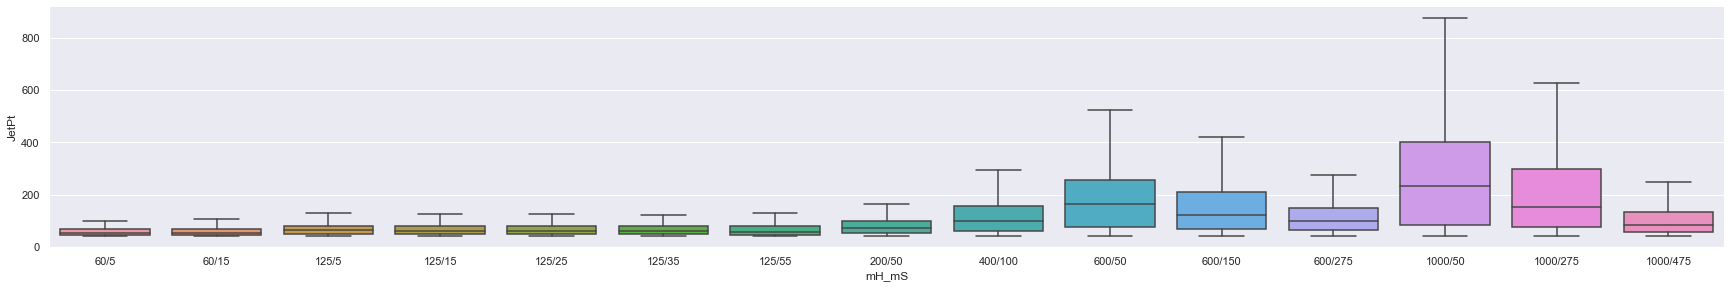

In [37]:
%%time
sns.catplot(x="mH_mS", y="JetPt", kind="box", data=all_jets, showfliers=False)
set_fig_size()

Wall time: 18min 58s


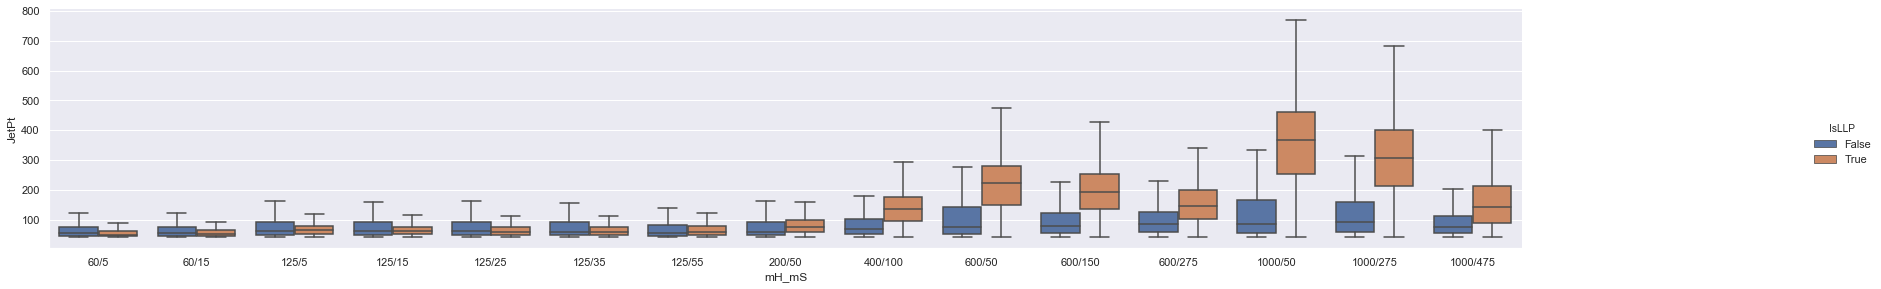

In [44]:
%%time
sns.catplot(x="mH_mS", y="JetPt", hue='IsLLP', kind="box", data=all_jets, showfliers=False)
set_fig_size()

Wall time: 12min 48s


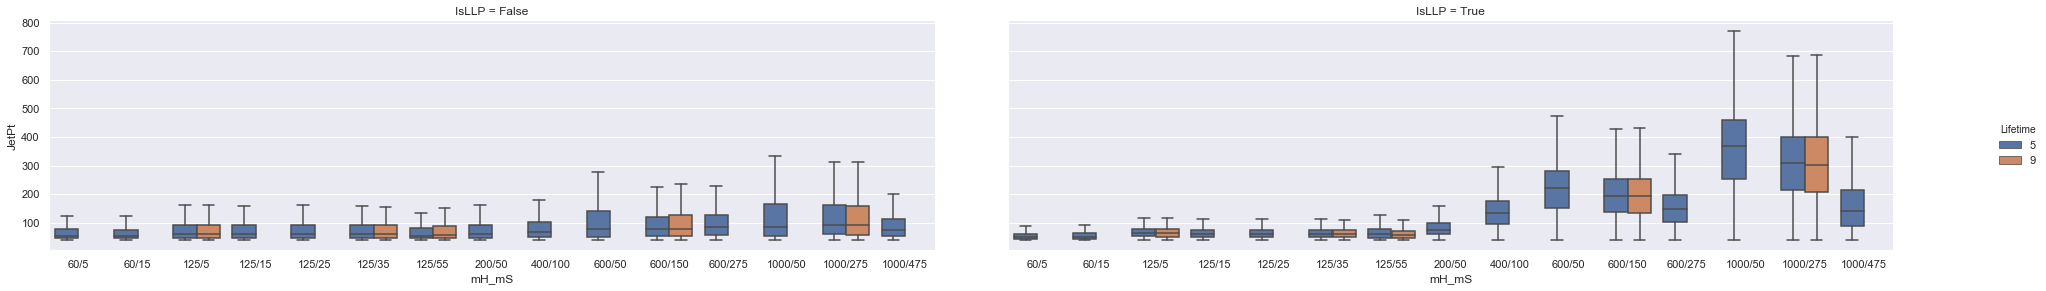

In [45]:
%%time
sns.catplot(x="mH_mS", y="JetPt", hue='Lifetime', col='IsLLP', kind="box", data=all_jets, showfliers=False)
set_fig_size()

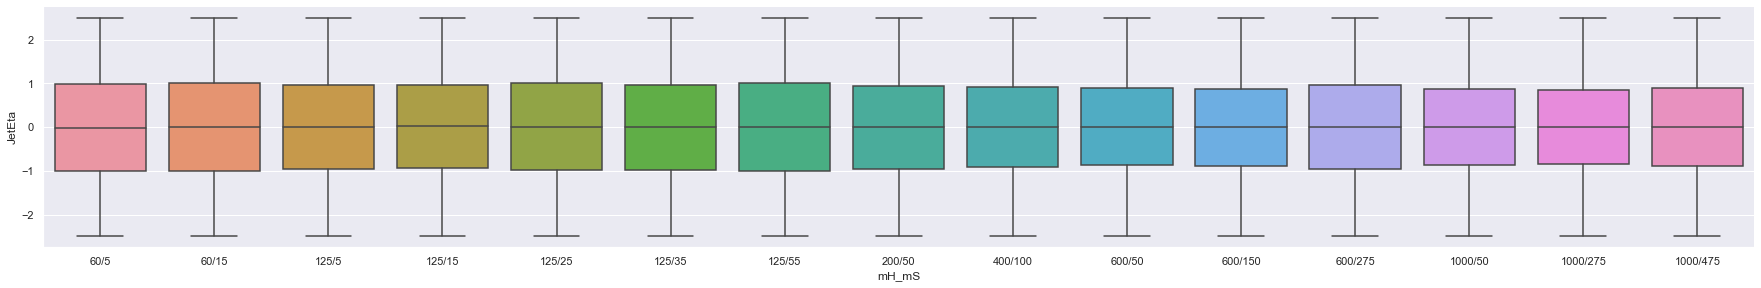

In [38]:
sns.catplot(x="mH_mS", y="JetEta", kind="box", data=all_jets)
set_fig_size()

## $L_{xy}$

How does the MC truth look in these various samples?

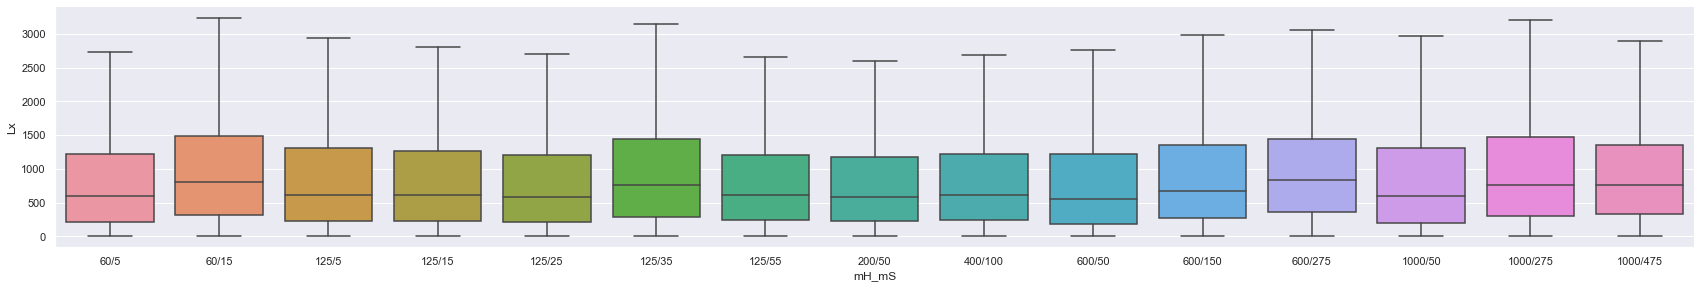

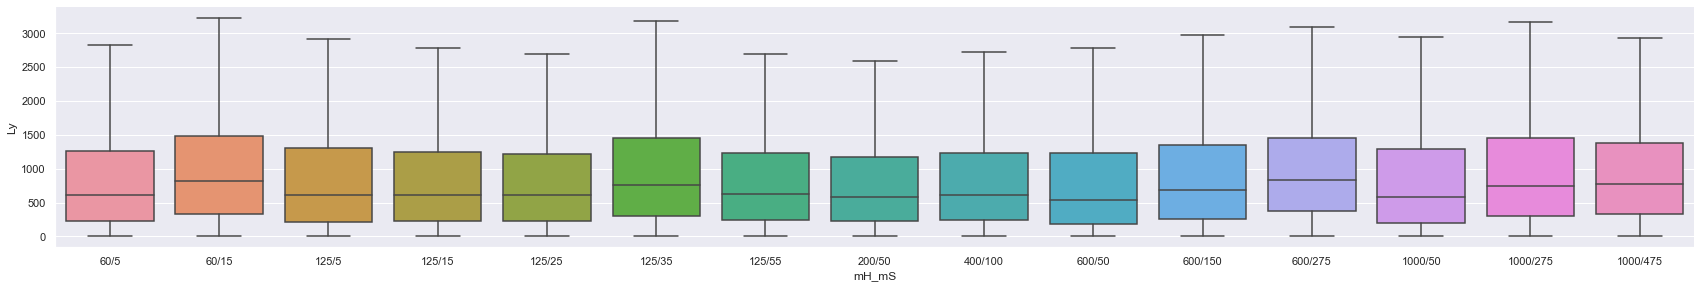

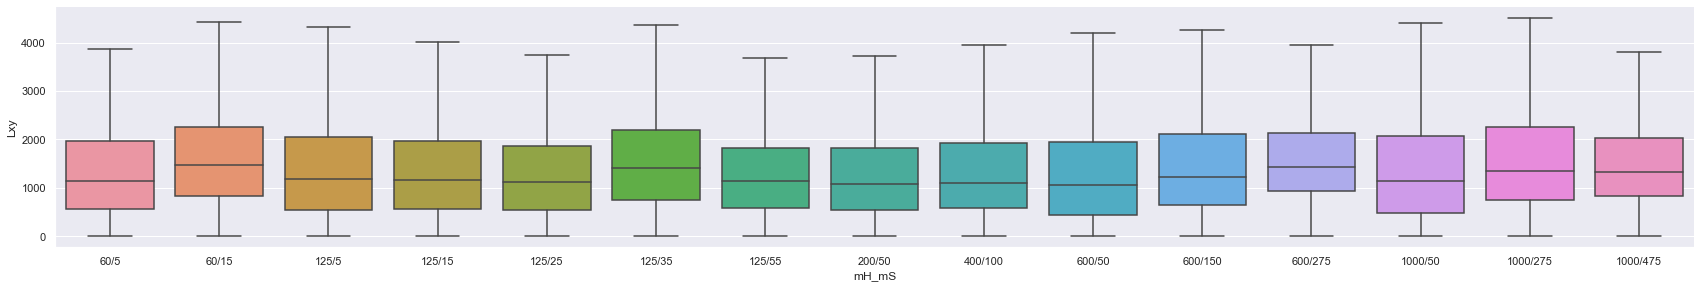

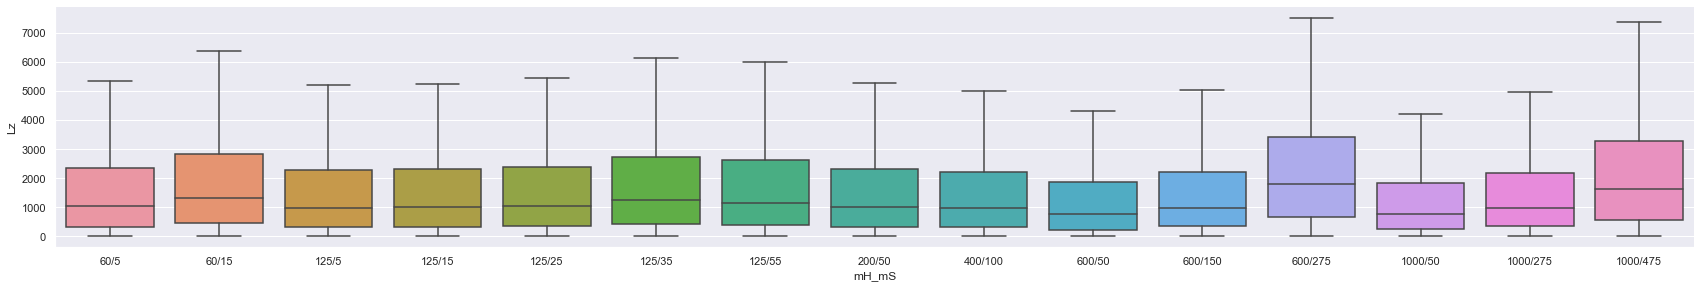

In [46]:
sns.catplot(x="mH_mS", y="Lx", kind="box", data=all_jets[all_jets.IsLLP], showfliers=False)
set_fig_size()
sns.catplot(x="mH_mS", y="Ly", kind="box", data=all_jets[all_jets.IsLLP], showfliers=False)
set_fig_size()
sns.catplot(x="mH_mS", y="Lxy", kind="box", data=all_jets[all_jets.IsLLP], showfliers=False)
set_fig_size()
sns.catplot(x="mH_mS", y="Lz", kind="box", data=all_jets[all_jets.IsLLP], showfliers=False)
set_fig_size()

And if we look at this as a function of lifetime there should be a clear difference.

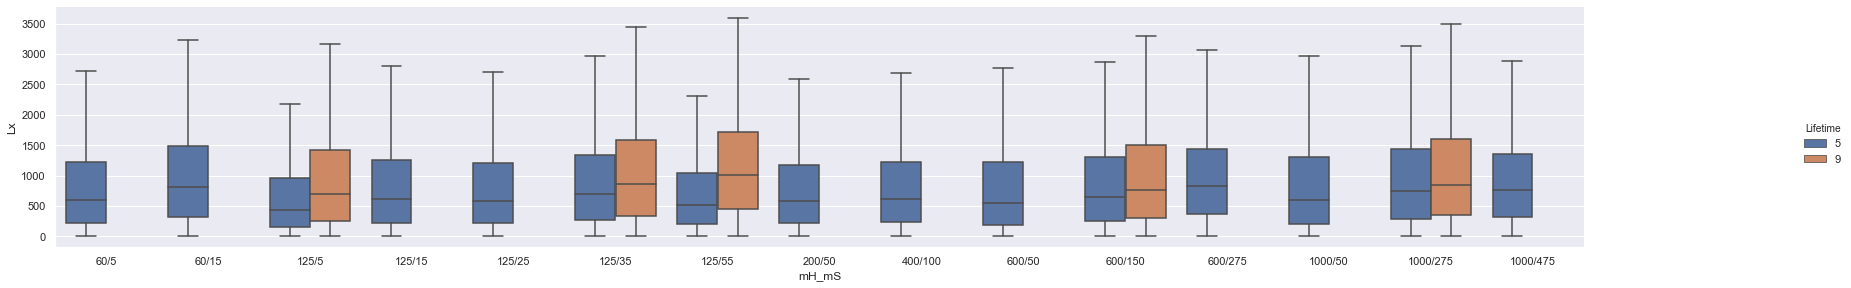

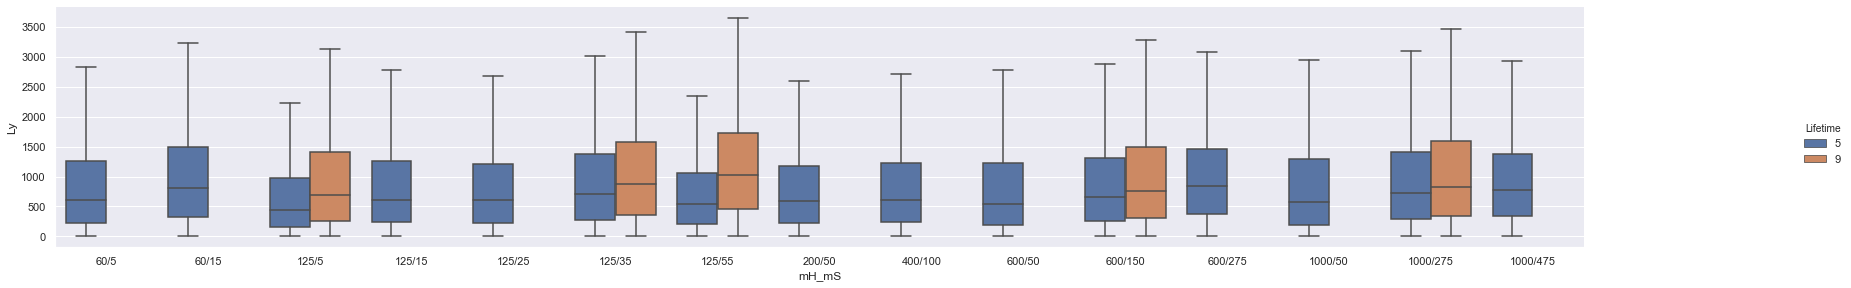

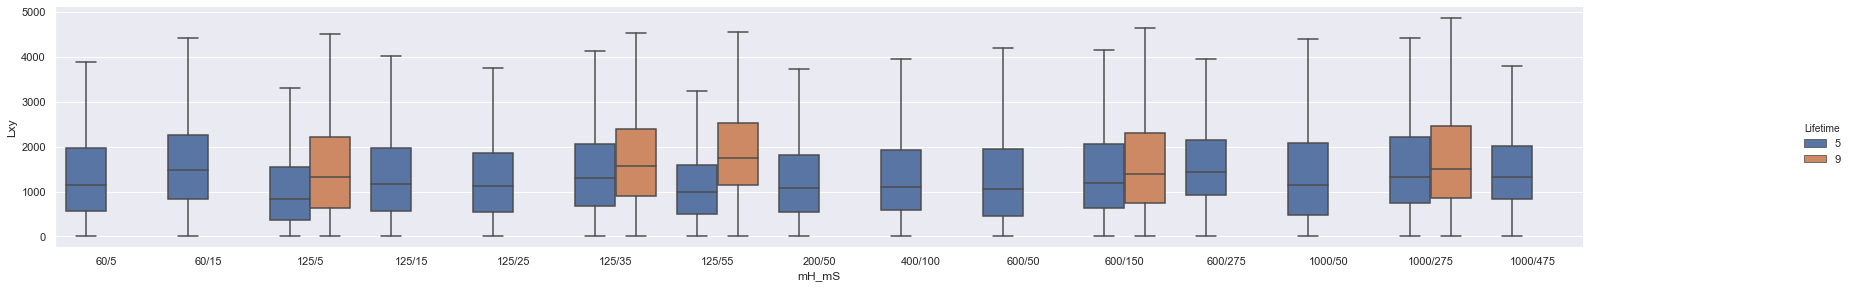

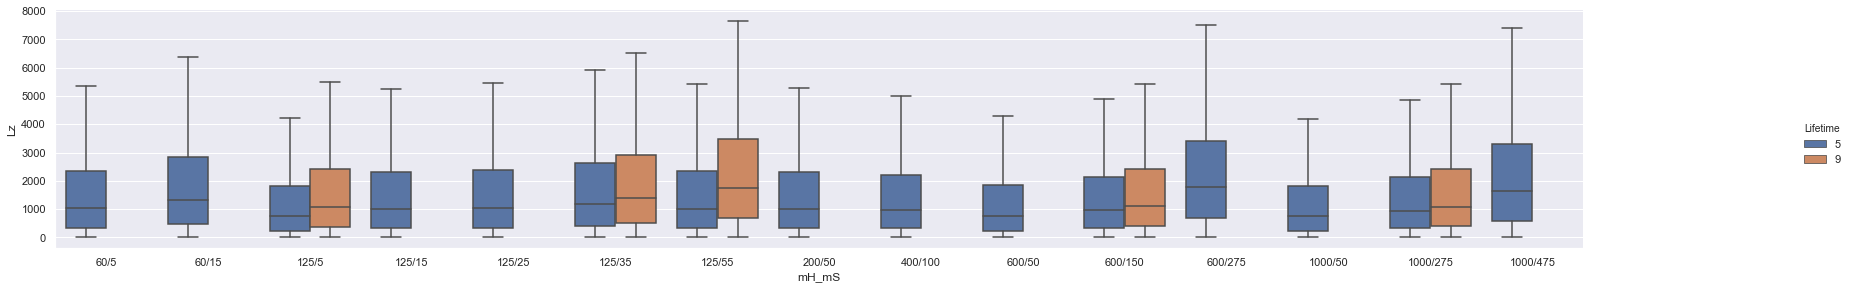

In [54]:
sns.catplot(x="mH_mS", y="Lx", hue='Lifetime', kind="box", data=all_jets[all_jets.IsLLP], showfliers=False)
set_fig_size()
sns.catplot(x="mH_mS", y="Ly", hue='Lifetime', kind="box", data=all_jets[all_jets.IsLLP], showfliers=False)
set_fig_size()
sns.catplot(x="mH_mS", y="Lxy", hue='Lifetime', kind="box", data=all_jets[all_jets.IsLLP], showfliers=False)
set_fig_size()
sns.catplot(x="mH_mS", y="Lz", hue='Lifetime', kind="box", data=all_jets[all_jets.IsLLP], showfliers=False)
set_fig_size()

I'd really like to make a plot of $m_H-2m_S$ and the $L_{xy}$, however the problem with that is that we don't have the actual lifetime here - just the lifetime in $c\tau$.

## MC Campaigns

We have different MC campaigns all mixed together. Is there any differences in these distributions? There shouldn't be any difference at the level we are working with here!

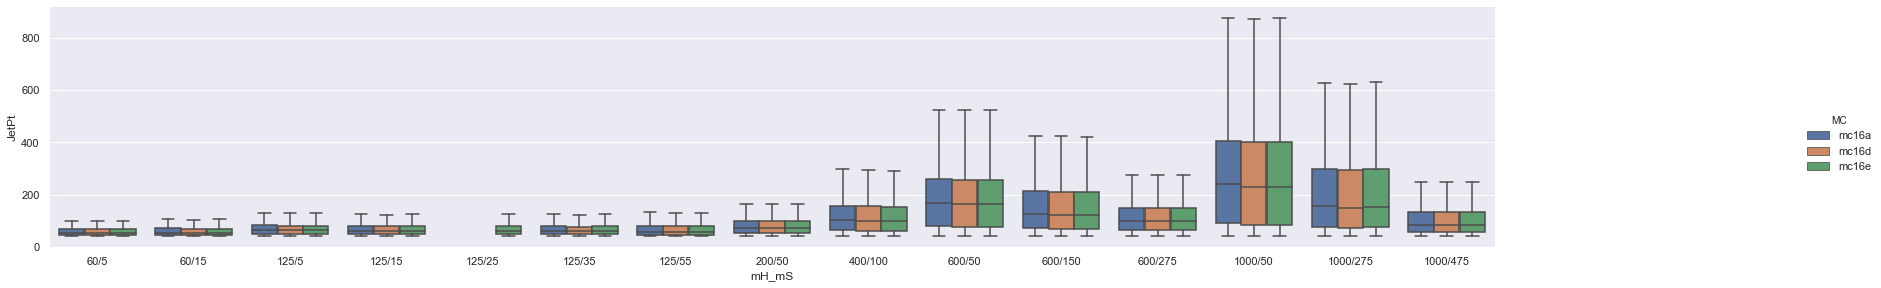

In [41]:
sns.catplot(x="mH_mS", y="JetPt", kind="box", hue="MC", data=all_jets, showfliers=False)
set_fig_size()

And the decay of the particles should not vary as a function of the campaign either!

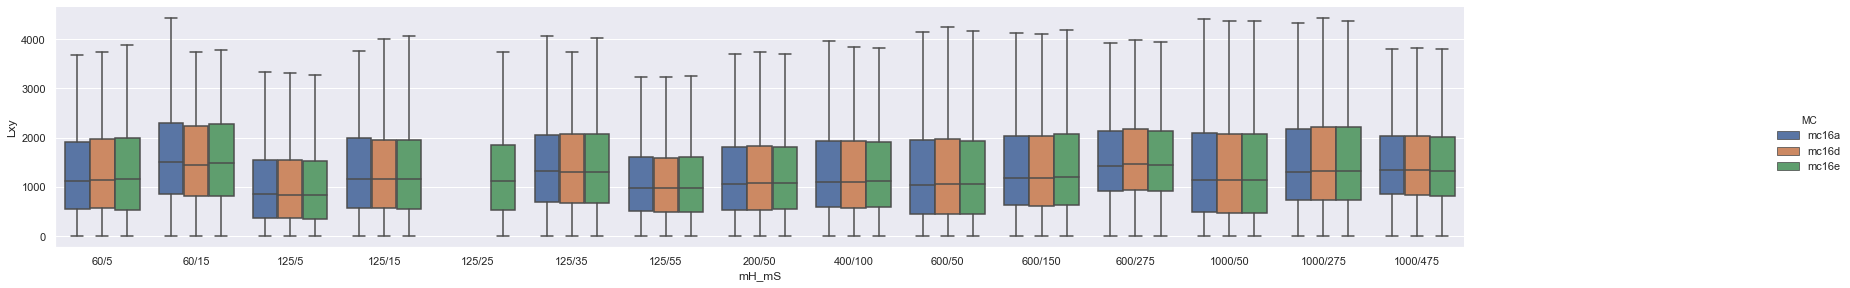

In [51]:
sns.catplot(x="mH_mS", y="Lxy", hue='MC', kind="box", data=all_jets[(all_jets.Lifetime==5) & (all_jets.IsLLP==1)], showfliers=False)
set_fig_size()

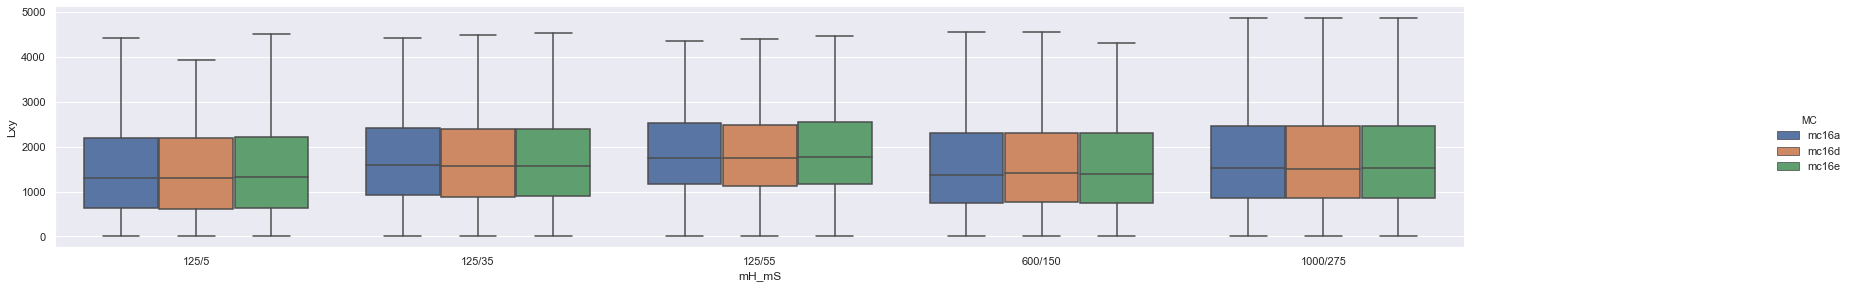

In [53]:
sns.catplot(x="mH_mS", y="Lxy", hue='MC', kind="box", data=all_jets[(all_jets.Lifetime==9)  & (all_jets.IsLLP==1)], showfliers=False)
set_fig_size()

## Long Lived Particle Truth and $\eta$

When Rachel looked at this, she recommended paying attention to $L_{zy}$ when $|\eta|<1.5$ and $L_z$ for $|\eta|>=1.5$. So, given we have the MC results here, lets look at how the distributions look as a function of jet $\eta$.

The funny shapes (or dips or cut-outs, depending on which two plots you are looking at) are explained by the angle w.r.t. the vertical, and how long in $L_z$ that line can be when it intersects with the outter barrel of the calorimeter. Where the behavior fundamentally changes (around $|\eta|=1.2$), is where the transition between the barrel and endcap or extended barrel occurs.

Look at a single sample in order to get a feel for this ($m_H=125$, $m_s=55$, $c\tau=5$ m).

In [66]:
m125_m55_ltlow = pd.concat([i[2] for i in r if i[1].startswith('125_55_5')])

In [8]:
lxyz_eta_division = 1.3

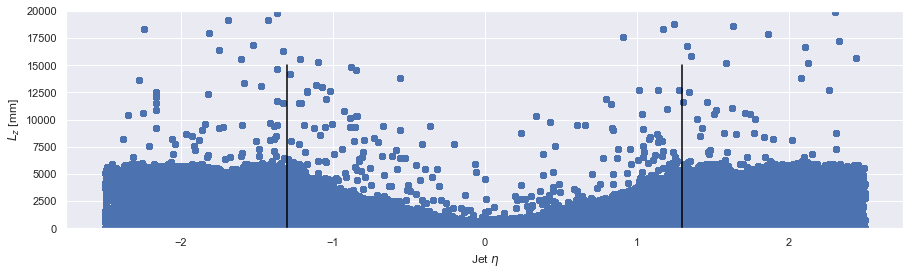

In [87]:
plt.scatter(m125_m55_ltlow.JetEta, m125_m55_ltlow.Lz)
plt.ylabel('$L_z$ [mm]')
plt.xlabel('Jet $\eta$')
plt.ylim((0.0, 20000))
plt.plot((-lxyz_eta_division, -lxyz_eta_division), (0, 15000), color="black")
plt.plot((lxyz_eta_division, lxyz_eta_division), (0, 15000), color="black")
_ = plt.show()

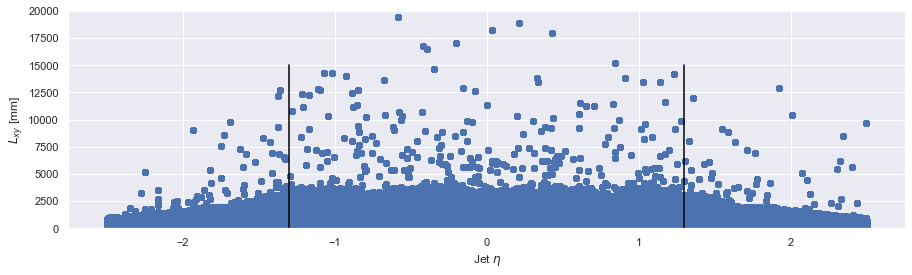

In [88]:
plt.scatter(m125_m55_ltlow.JetEta, np.sqrt(np.square(m125_m55_ltlow.Lx)+np.square(m125_m55_ltlow.Ly)))
plt.ylabel('$L_{xy}$ [mm]')
plt.xlabel('Jet $\eta$')
plt.ylim((0.0, 20000))
plt.plot((-lxyz_eta_division, -lxyz_eta_division), (0, 15000), color="black")
plt.plot((lxyz_eta_division, lxyz_eta_division), (0, 15000), color="black")
_ = plt.show()

Two things to note here:

- An $\eta$ of 1.3 seems to make a bit more sense as a cut
- There are a lot of jets with a $L_z$ or $L_{xy}$ that is much larger than we would expect for the barrel or end-caps of the calorimeter

## What are the large $L_{xy}$/$L_{z}$ points?

In the $L_{xy}$ and $L_z$ vs $\eta$ plots above, there is a significant number of particles that have very large $L_{xy}$ (and $L_z$). I suspect those are LLP's that are randomly associated with jets - volenteers, as we used to say. We can probably see this by looking at the $\Delta R$ between the LLP and the jet.

- It isn't clear to me this are in our real sample as they wouldn't have passed the trigger.

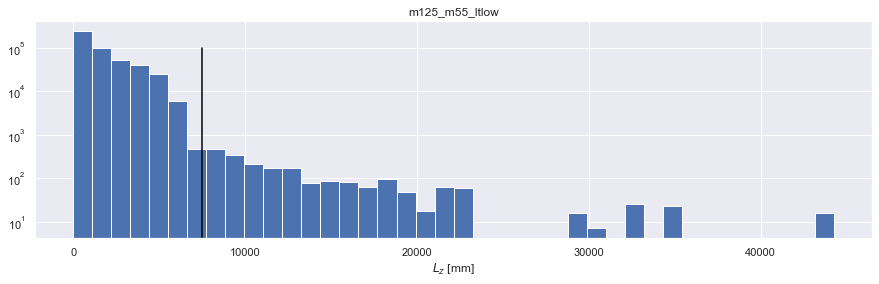

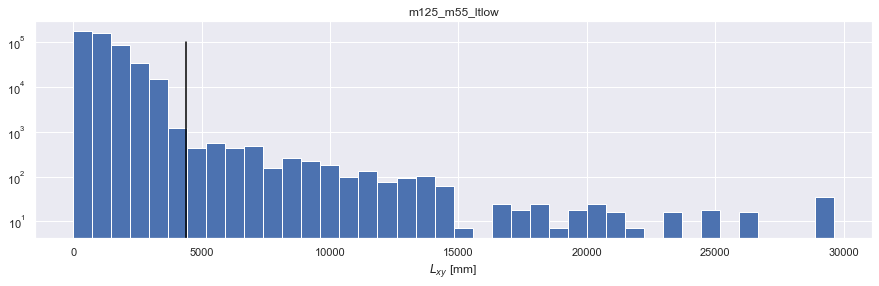

In [70]:
Lx = m125_m55_ltlow.Lx[m125_m55_ltlow.IsLLP]
Ly = m125_m55_ltlow.Ly[m125_m55_ltlow.IsLLP]
Lxy = np.sqrt(np.square(Lx)+np.square(Ly))
Lz = m125_m55_ltlow.Lz[m125_m55_ltlow.IsLLP]
Leta = m125_m55_ltlow.Leta[m125_m55_ltlow.IsLLP]
Lphi = m125_m55_ltlow.Lphi[m125_m55_ltlow.IsLLP]

plt.hist(Lz, bins=40)
plt.title('m125_m55_ltlow')
plt.yscale('log')
plt.xlabel('$L_z$ [mm]')
plt.plot((7500, 7500), (0, 1e5), color="black")
plt.show()

plt.hist(Lxy, bins=40)
plt.title('m125_m55_ltlow')
plt.yscale('log')
plt.xlabel('$L_{xy}$ [mm]')
plt.plot((4400, 4400), (0, 1e5), color="black")
plt.show()

In [9]:
too_far_dist_lz = 7500
too_far_dist_lxy = 4400

In [86]:
too_far_lz = Lz > too_far_dist_lz
too_far_lxy = Lxy > too_far_dist_lxy
print (f'outliers in Lxy: {sum(too_far_lxy)}, outliers in Lx: {sum(too_far_lz)}')

outliers in Lxy: 3560, outliers in Lx: 2128


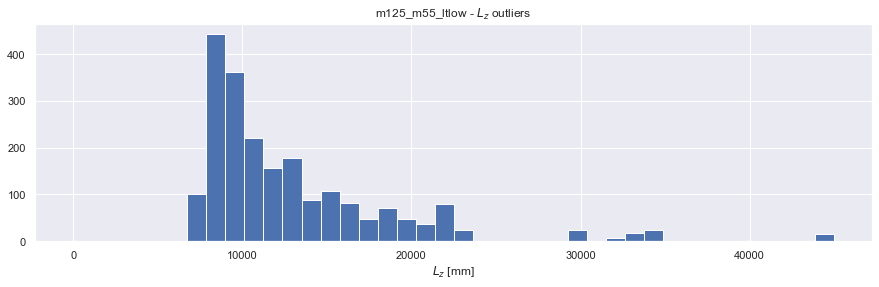

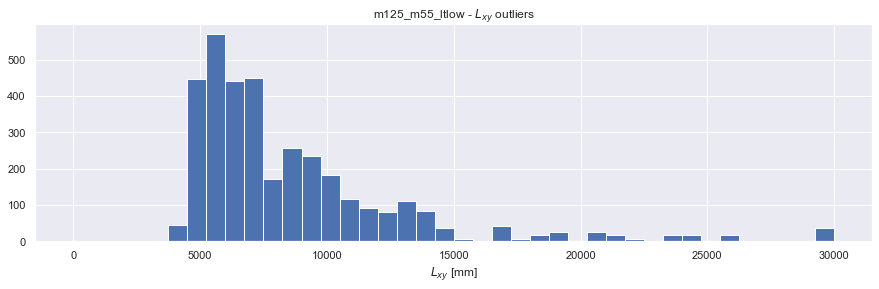

In [77]:
plt.hist(Lz[too_far_lz], bins=40, range=(0,45000))
plt.title('m125_m55_ltlow - $L_z$ outliers')
plt.xlabel('$L_z$ [mm]')
plt.show()

plt.hist(Lxy[too_far_lxy], bins=40, range=(0,30000))
plt.title('m125_m55_ltlow - $L_{xy}$ outliers')
plt.xlabel('$L_{xy}$ [mm]')
plt.show()

I had some trouble getting $\Delta R$ calculated correctly. So, here is proof that $\Delta R$ is getting correctly calculated.

Please note there is more going on in the `while` line that first meets the eye!!!

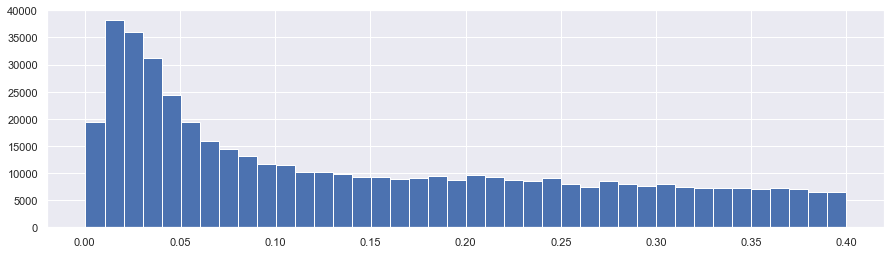

In [79]:
JL_D_eta = m125_m55_ltlow.JetEta[m125_m55_ltlow.IsLLP] - Leta
JL_D_phi = m125_m55_ltlow.JetPhi[m125_m55_ltlow.IsLLP] - Lphi
while sum(JL_D_phi>=np.pi) > 0:
    JL_D_phi = JL_D_phi - (JL_D_phi>=np.pi)*2*np.pi
while sum(JL_D_phi<-np.pi) > 0:
    JL_D_phi = JL_D_phi + (JL_D_phi<-np.pi)*2*np.pi
JL_DeltaR = np.sqrt(np.square(JL_D_eta) + np.square(JL_D_phi))
plt.hist(JL_DeltaR, bins=40)
plt.show()

Given the cuttoffs defined earlier, `too_far_lz` and `too_far_lxy`, lets plot the number of those vs $\Delta R$ so we can see how this changes as a function of $\Delta R$.

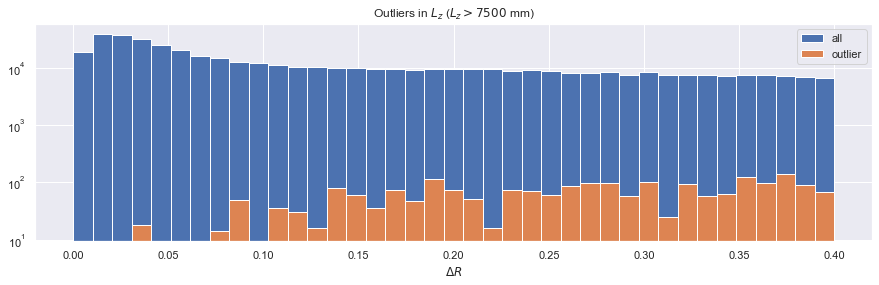

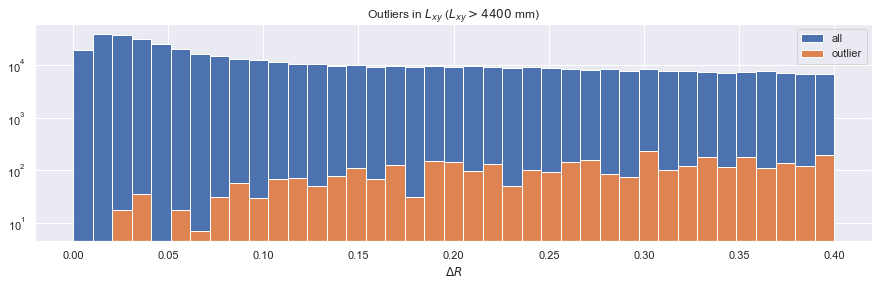

In [81]:
bins = np.linspace(0.0, 0.4, 40)

plt.hist(JL_DeltaR, bins, label='all')
plt.hist(JL_DeltaR[too_far_lz], bins, label='outlier')
plt.yscale('log')
plt.xlabel('$\Delta R$')
plt.title('Outliers in $L_z$ ($L_z>7500$ mm)')
plt.legend()
plt.show()

plt.hist(JL_DeltaR, bins, label='all')
plt.hist(JL_DeltaR[too_far_lxy], bins, label='outlier')
plt.yscale('log')
plt.xlabel('$\Delta R$')
plt.title('Outliers in $L_{xy}$ ($L_{xy}>4400$ mm)')
plt.legend()
plt.show()

These are log scale plots, so even at its worst (in the $L_{xy}$ plot), that corresponds to about 1% of jets are outliers.

The above is for the one dataset - lets look at these distributions in a general way for all of our datasets.

First we have to calculate $\Delta R$ for all the datasets rather than just the one we were looking at!

In [82]:
all_JL_D_eta = all_jets.JetEta[all_jets.IsLLP] - all_jets.Leta[all_jets.IsLLP]
all_JL_D_phi = all_jets.JetPhi[all_jets.IsLLP] - all_jets.Lphi[all_jets.IsLLP]
while sum(all_JL_D_phi>=np.pi) > 0:
    all_JL_D_phi = all_JL_D_phi - (all_JL_D_phi>=np.pi)*2*np.pi
while sum(all_JL_D_phi<-np.pi) > 0:
    all_JL_D_phi = all_JL_D_phi + (all_JL_D_phi<-np.pi)*2*np.pi
all_JL_DeltaR = np.sqrt(np.square(all_JL_D_eta) + np.square(all_JL_D_phi))
all_jets['DeltaR'] = all_JL_DeltaR

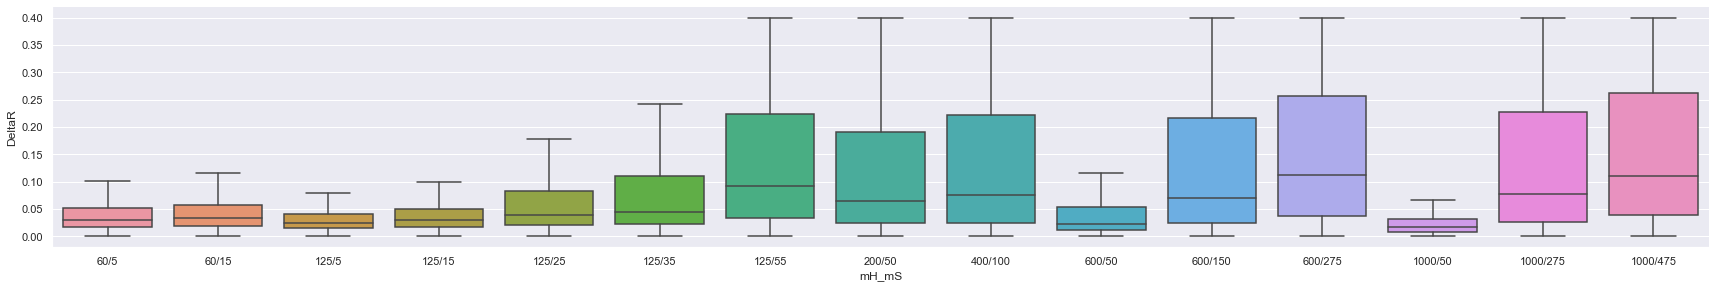

In [85]:
sns.catplot(x="mH_mS", y="DeltaR", kind="box", data=all_jets[all_jets.IsLLP], showfliers=False)
set_fig_size()

In [16]:
all_jets['IsOutlier'] = False
all_jets['IsOutlier'] |= all_jets.Lxy[all_jets.IsLLP & (np.abs(all_jets.JetEta) < lxyz_eta_division)] > too_far_dist_lxy
all_jets['IsOutlier'] |= all_jets.Lz[all_jets.IsLLP & (np.abs(all_jets.JetEta) >= lxyz_eta_division)] > too_far_dist_lz
all_jets['JetIsCentral'] = np.abs(all_jets.JetEta) < lxyz_eta_division

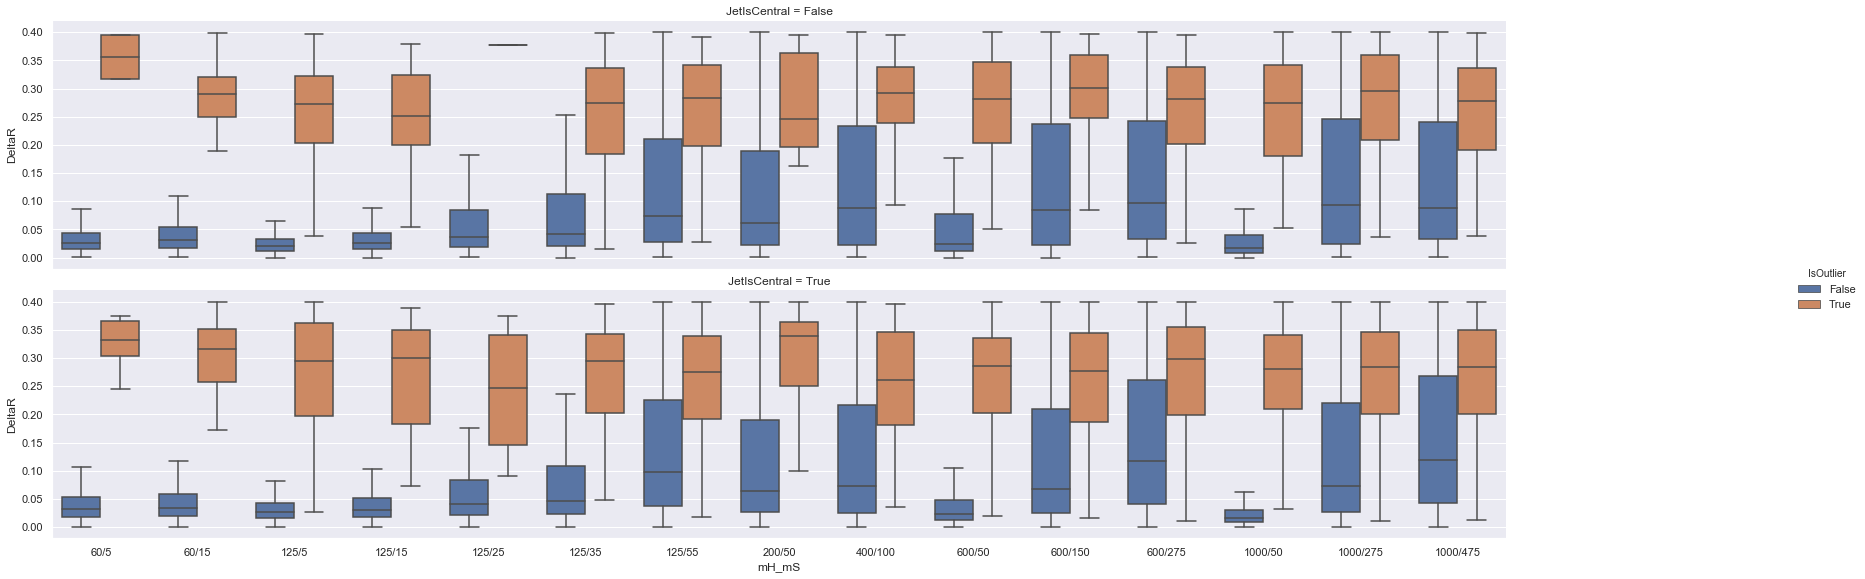

In [135]:
sns.catplot(x="mH_mS", y="DeltaR", hue='IsOutlier', row='JetIsCentral', kind="box", data=all_jets[all_jets.IsLLP], showfliers=False)
set_fig_size(2)

I find these plots fascinating, though I don't know how much actionable information they provide.

- We need to provide an upper cut-off on the training in $L_z$ or $L_{xy}$, as we determined above.
- In cases where the jet energy is low (e.g. low values of $m_H$) or cases where the jet energy is very high (large $m_H$ vs $m_S$ difference), we could cut on $\Delta R$ if we wanted to as well.
- The jet kinematics, and the relationship of $\Delta R$ is pretty much exactly as you'd expect (which I find fascinating) - very high $p_T$ jets tend to very narrow widths! This is clearly evidient in the `600/60` and the `1000/50` samples.

## MLP Input Variables

The decay position predictor (or MLP as it was called in the last analysis) uses the distribution of energy in the calorimeter layers to predict the location of the decay. So we are looking for the dependence of the $L_{xy}$ and $L_{z}$ on the layer fractions. Unfortunately, the way the data is put together means we can't use sns as we'd like here.

In [10]:
%%time
layers=['EMM_BL0',
       'EMM_BL1', 'EMM_BL2', 'EMM_BL3', 'EMM_EL0', 'EMM_EL1', 'EMM_EL2',
       'EMM_EL3', 'EH_EL0', 'EH_EL1', 'EH_EL2', 'EH_EL3', 'EH_CBL0',
       'EH_CBL1', 'EH_CVL2', 'EH_TGL0', 'EH_TGL1', 'EH_TGL2', 'EH_EBL0',
       'EH_EBL1', 'EH_EBL2', 'FC_L0', 'FC_L1', 'FC_L2']
all_jets['Lxy_binned'] = (all_jets.Lxy/5.0).round(0)*5.0
all_jets['Lz_binned'] = (all_jets.Lz/5.0).round(0)*5.0
good_barrel_data = all_jets[all_jets.IsLLP & (np.abs(all_jets.JetEta) < lxyz_eta_division) & (all_jets.Lxy < too_far_dist_lxy)]
good_endcap_data = all_jets[all_jets.IsLLP & (np.abs(all_jets.JetEta) >= lxyz_eta_division) & (all_jets.Lz < too_far_dist_lz)]

Wall time: 39.7 s


Lets look at strip plots where we average the contents for $L_{xy}$ and $L_z$. The binning is defined in the box above.

Wall time: 2min 10s


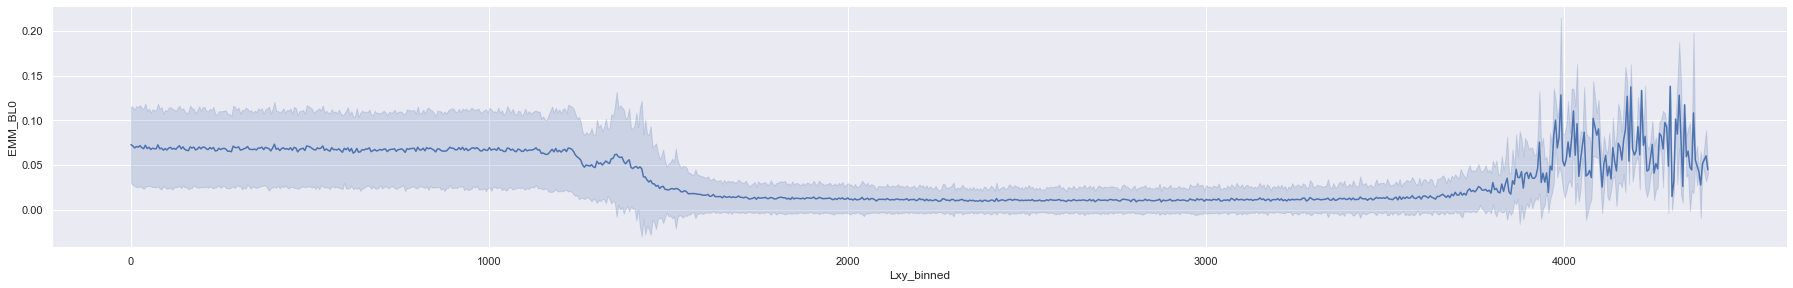

In [165]:
%%time
sns.relplot(x="Lxy_binned", y="EMM_BL0", ci='sd', kind="line", data=good_barrel_data)
set_fig_size()

Some details of this plot (and all the layer plots below):

- This is EM Layer 0, so is close to the front of the calorimeter.
- At the high end you can see, I think, that the large $L_{xy}$ guys start contributing. It could be our upper $L_{xy}$ cut is not hard enought.
- For LLP's with decay lengths less than about $~1200$ or so cm, the jets fully form before the calorimeter and clearly leave energy in this layer.
- For jets that are after $~1500$ no energy is left in this layer, as you would expect, as they decay past the layer.

C:\Users\gordo\Anaconda3\lib\site-packages\seaborn\axisgrid.py:311: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, axes = plt.subplots(nrow, ncol, **kwargs)


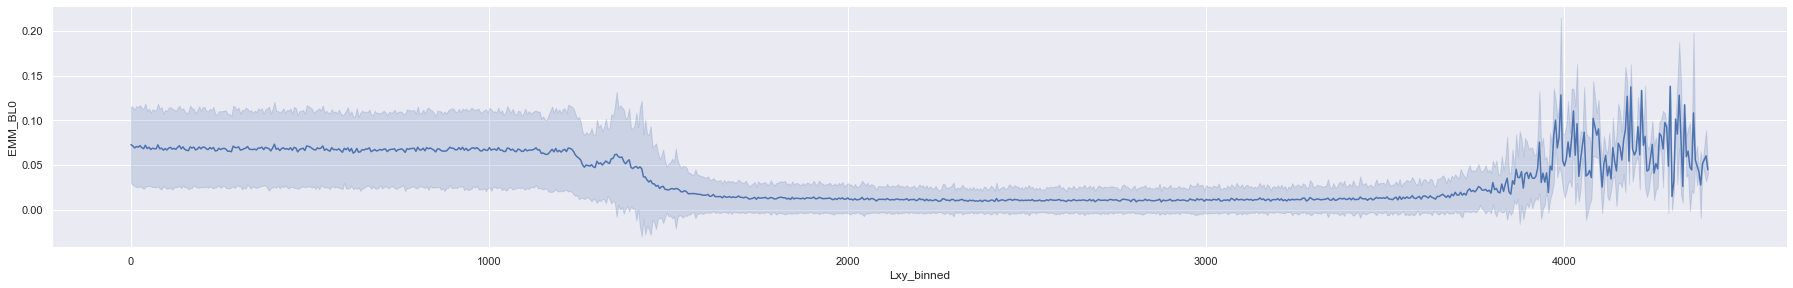

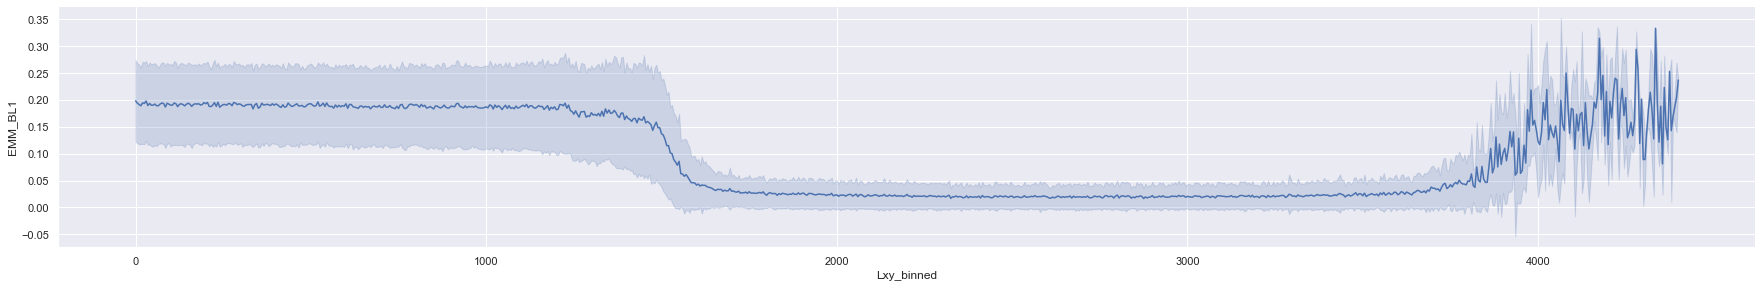

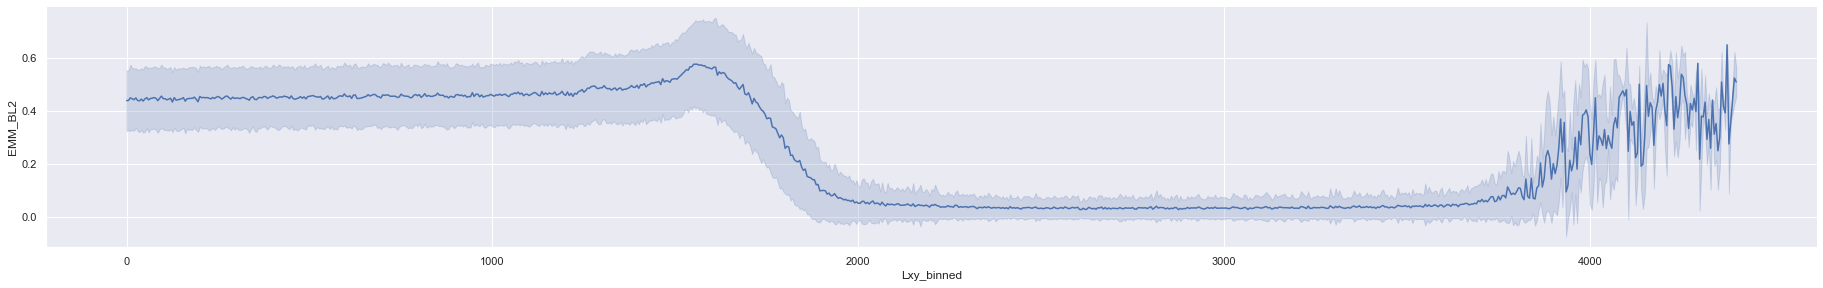

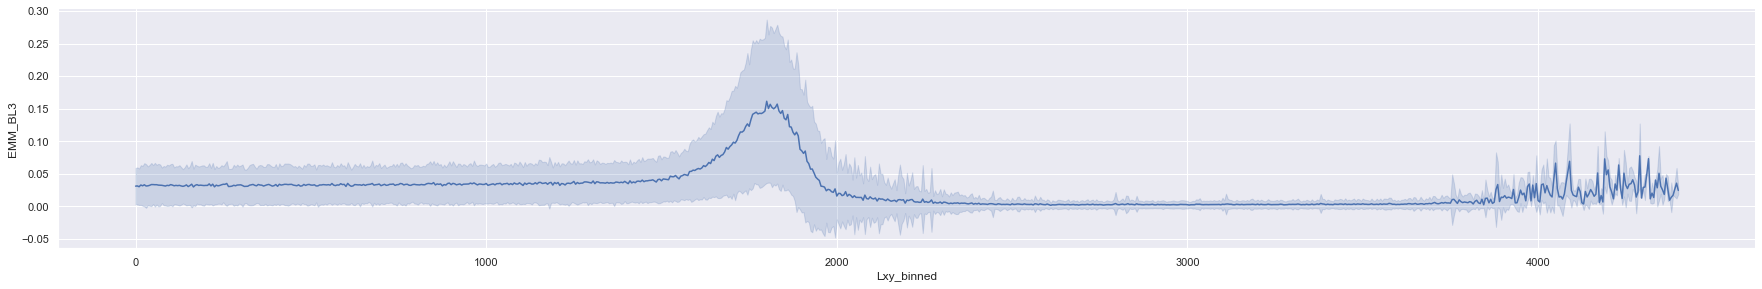

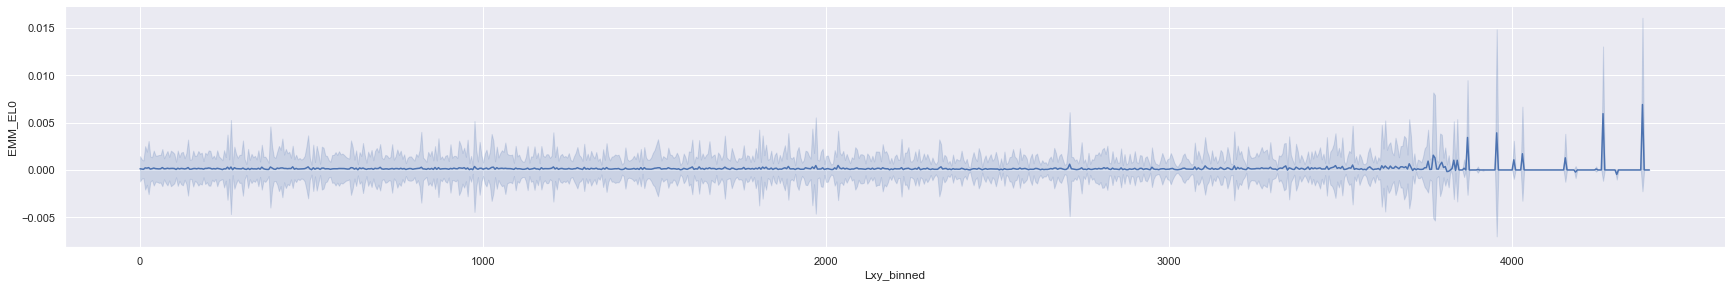

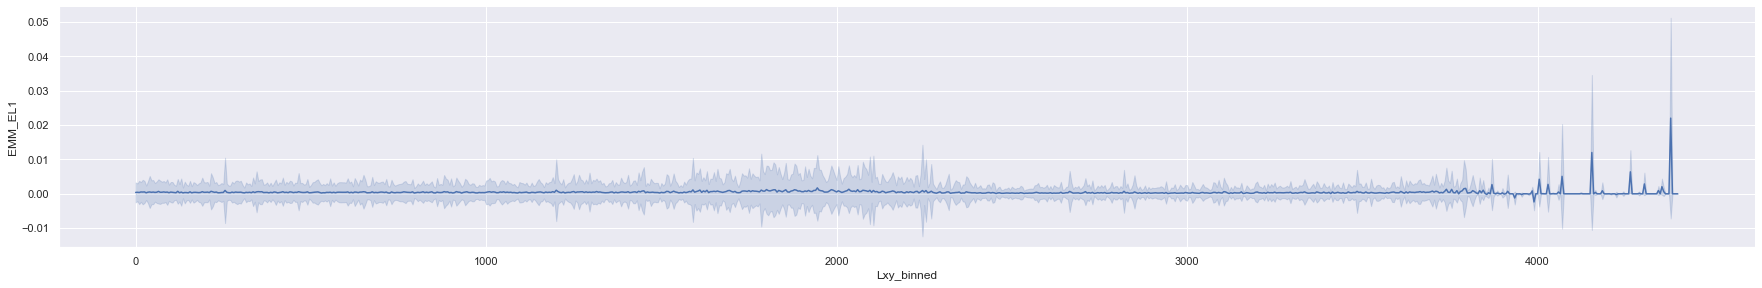

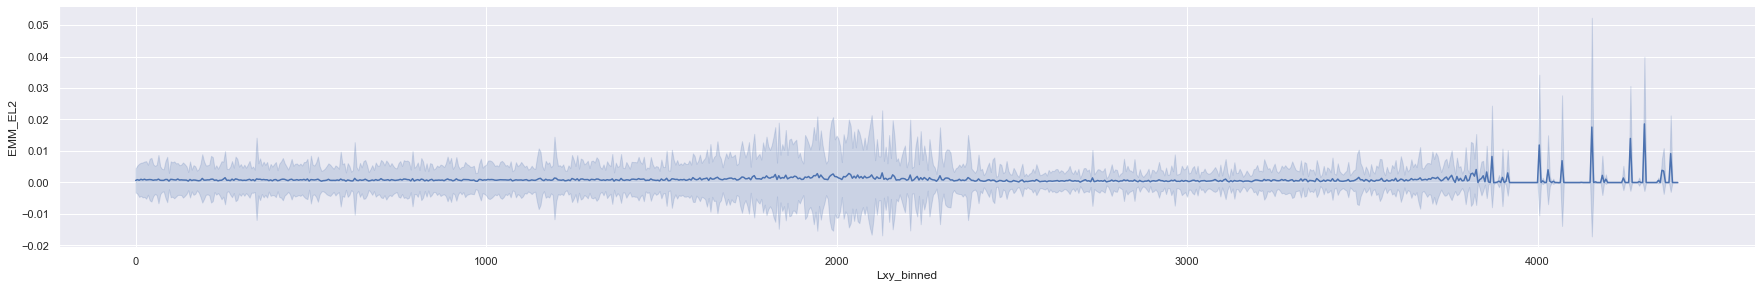

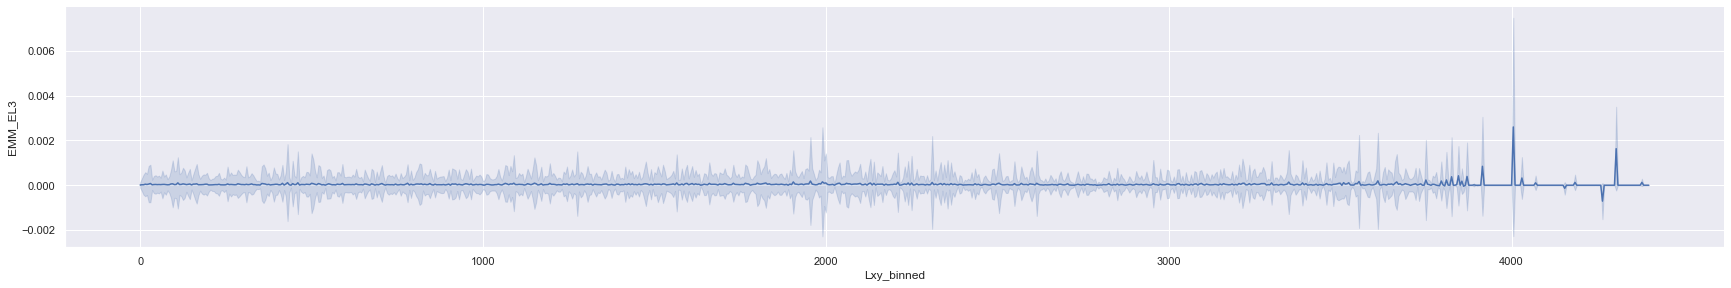

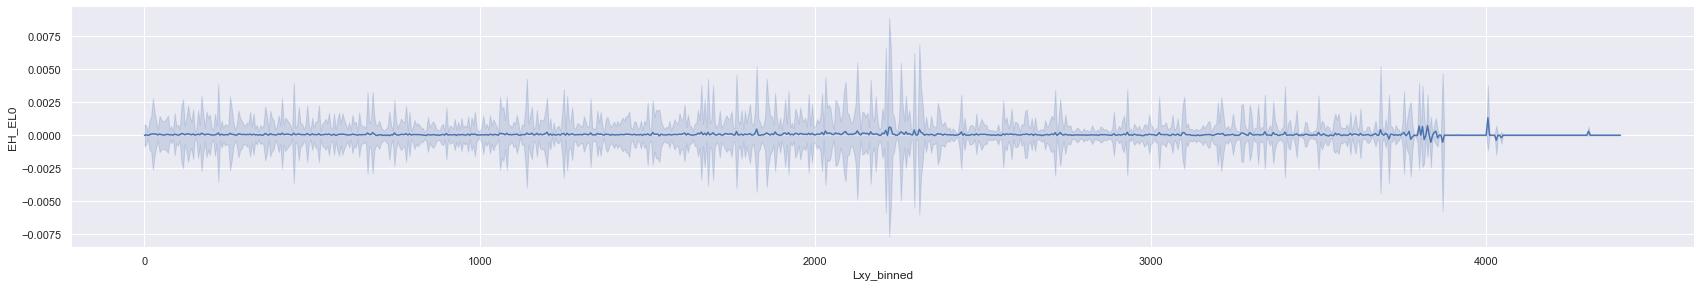

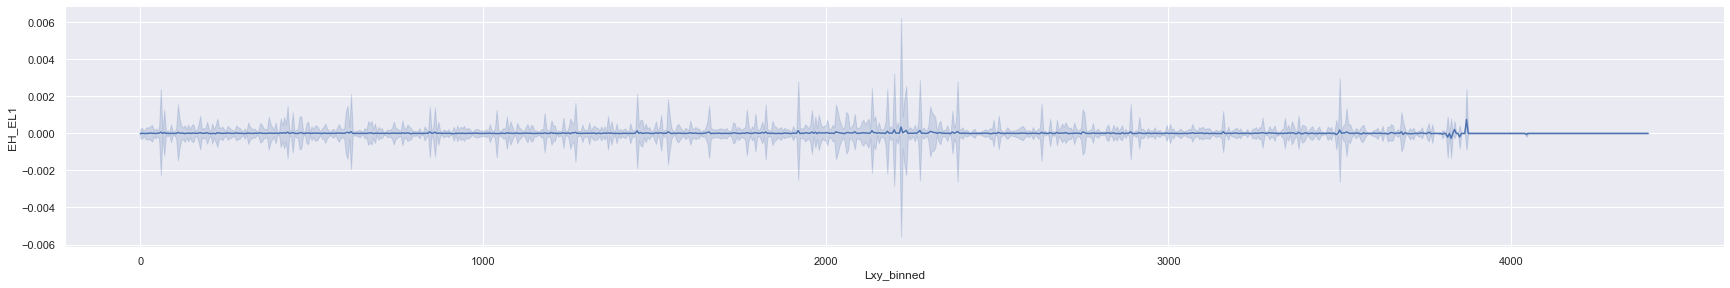

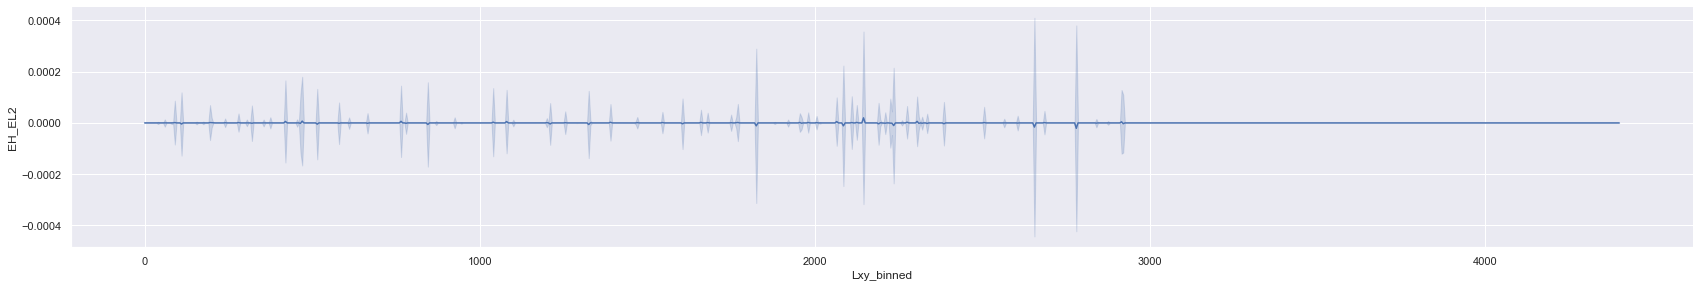

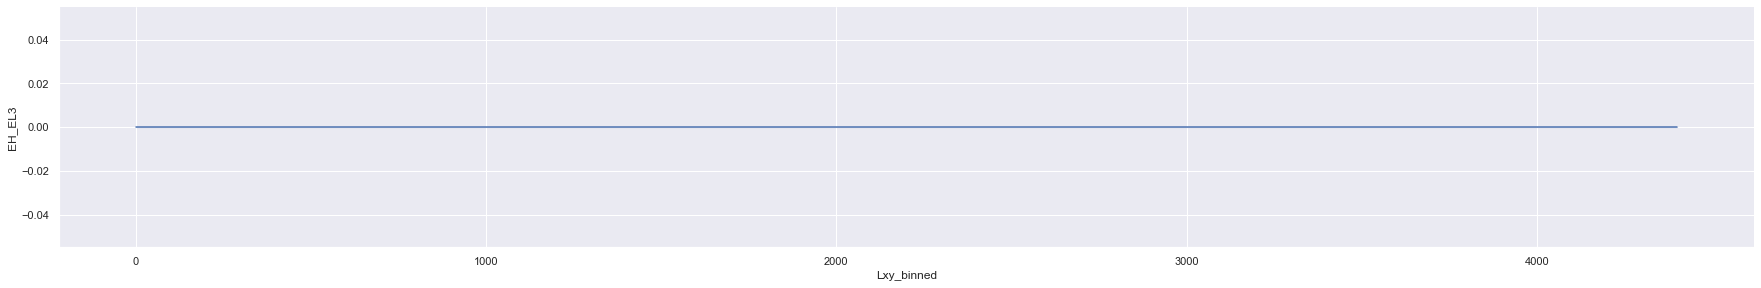

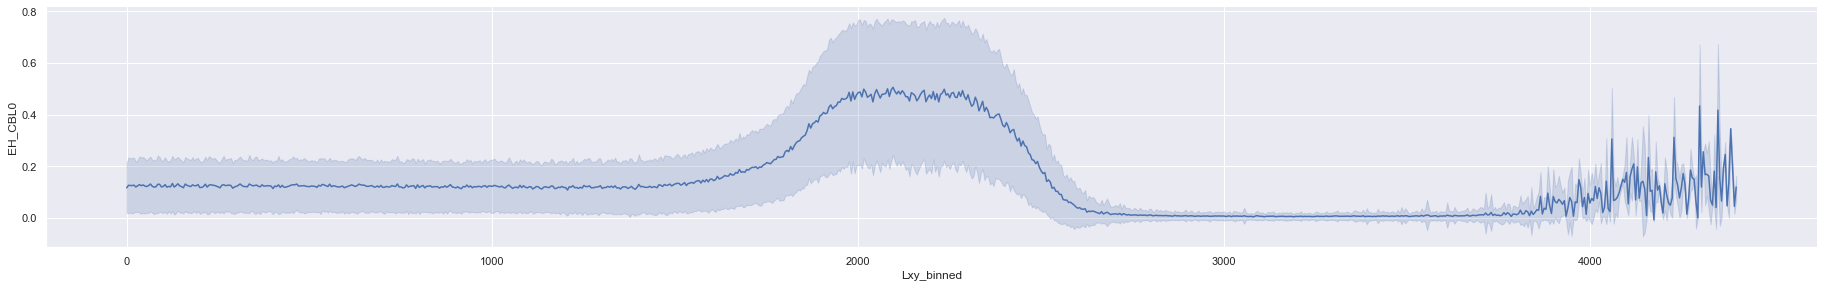

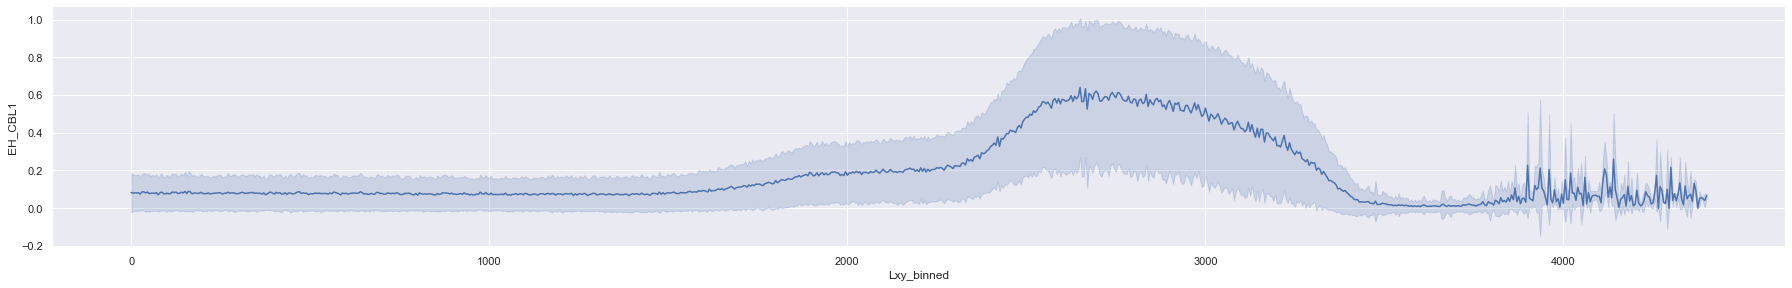

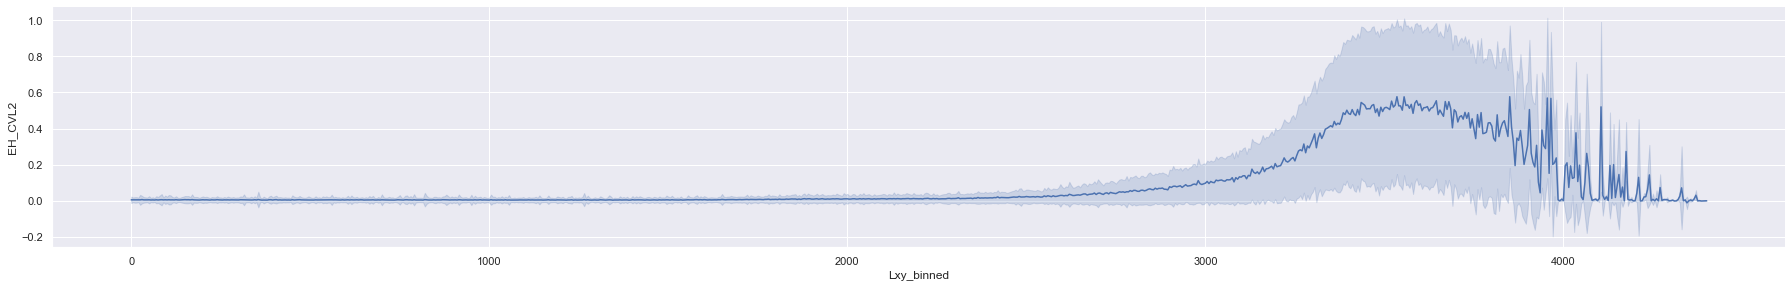

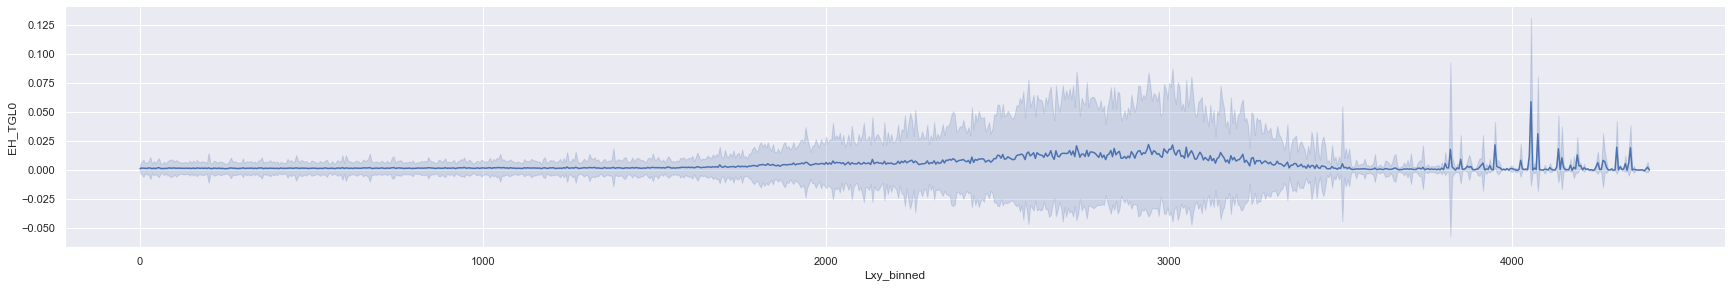

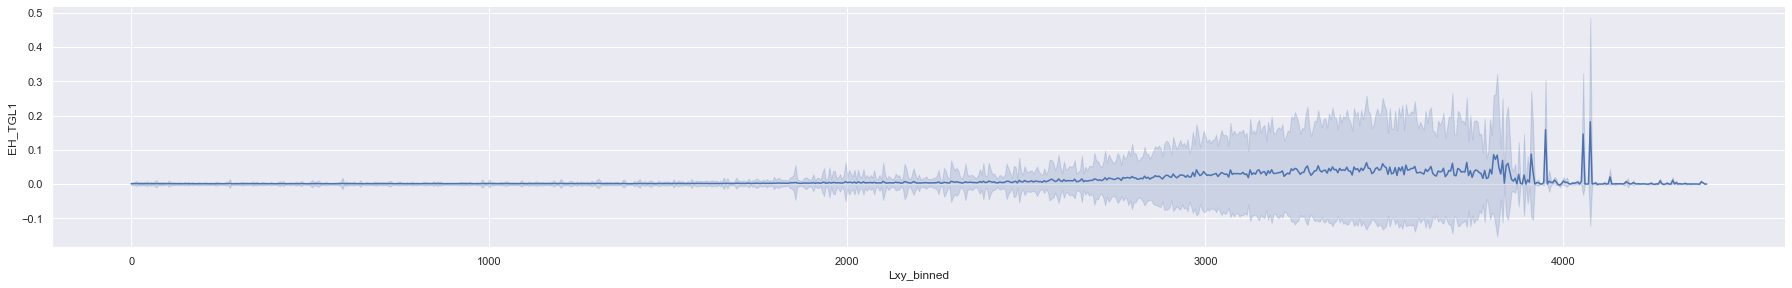

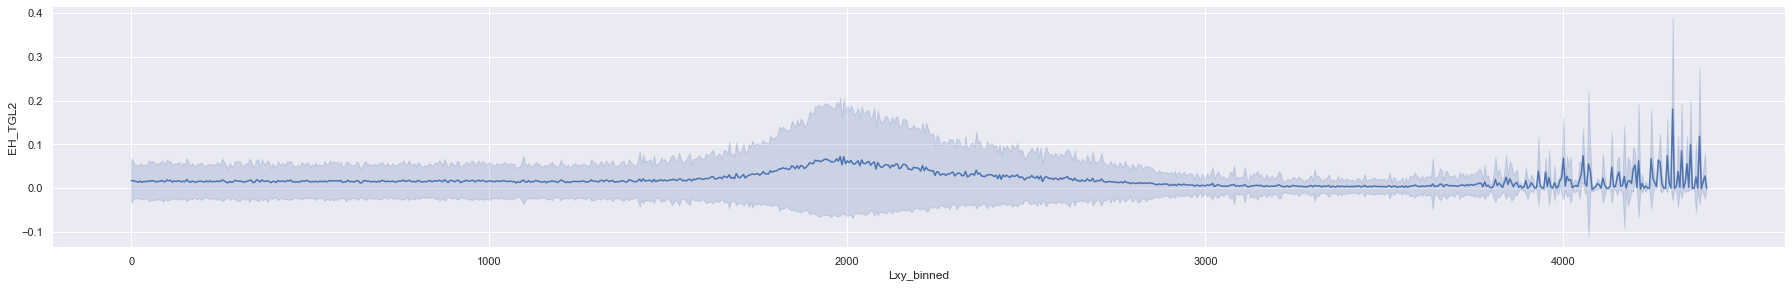

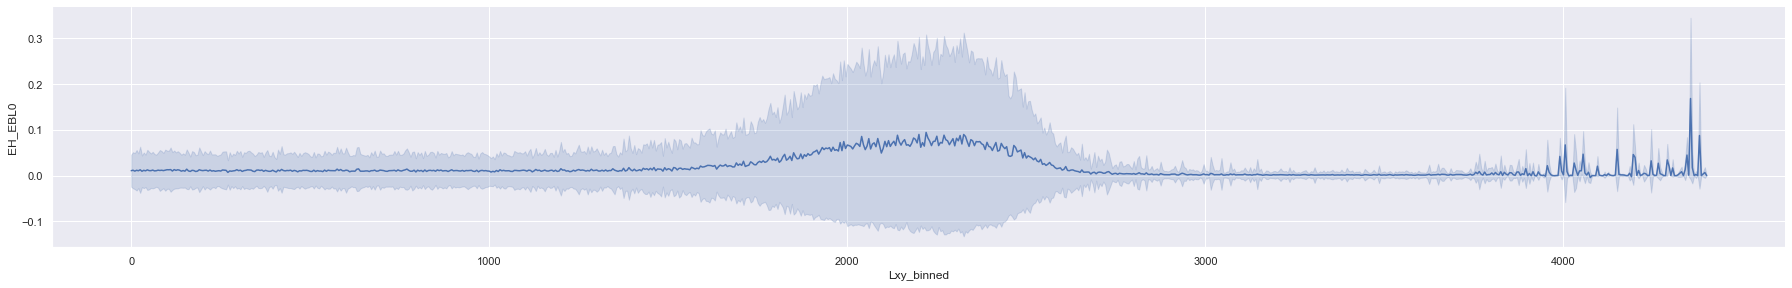

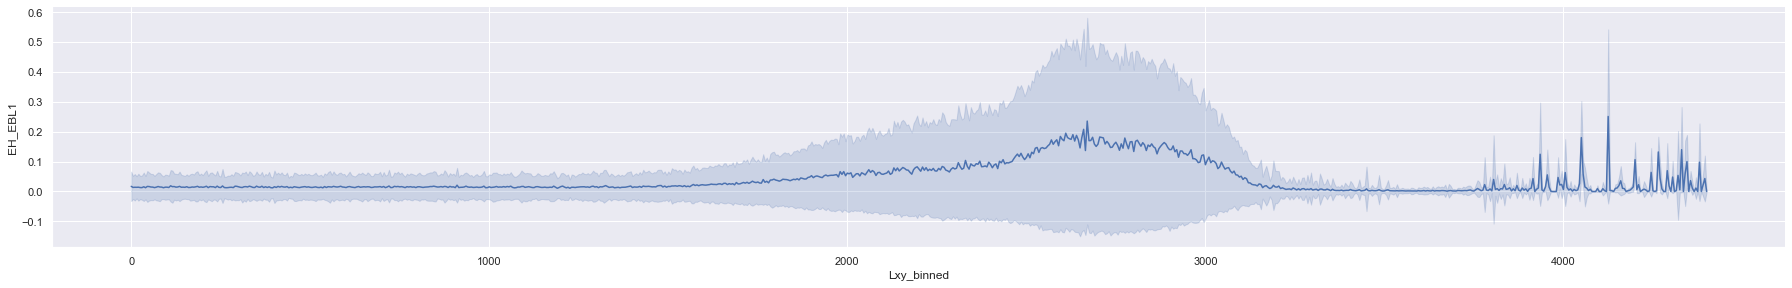

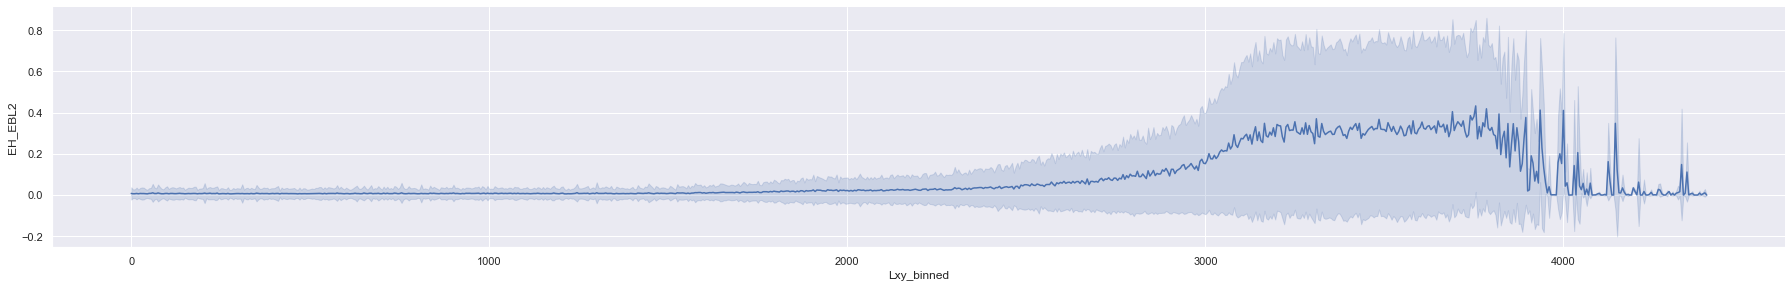

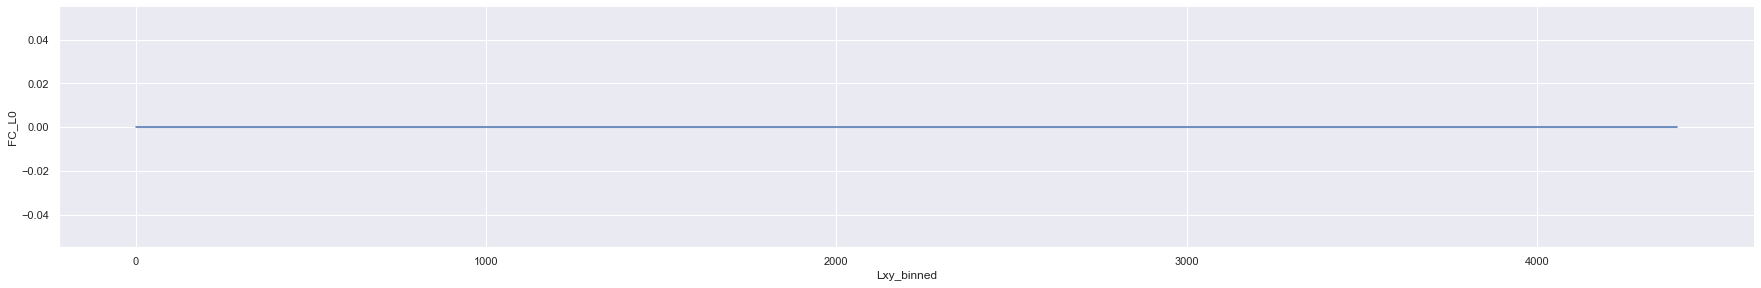

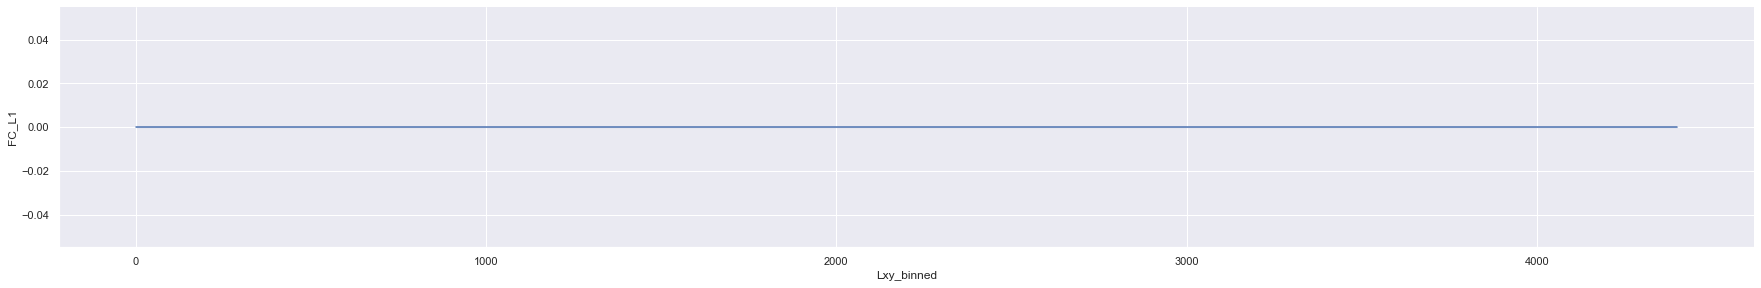

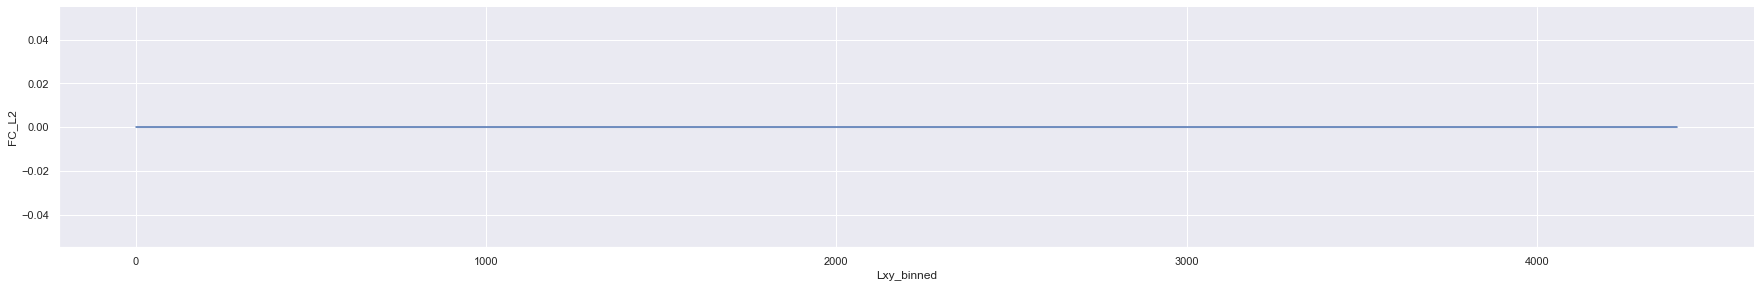

In [166]:
for layer in layers:
    sns.relplot(x="Lxy_binned", y=layer, ci='sd', kind="line", data=good_barrel_data)
    set_fig_size()

You can clearly see which layers are active, and you can see how a NN or MLP or whatever will be able to predict the decay location from the patterns evident here. It is also possible to see where things are first affected - and thus a lower bound on our training. Looking at a high resolution plot of EM_Layer0 (`EMM_BL0`) is probably the right thing to do here.

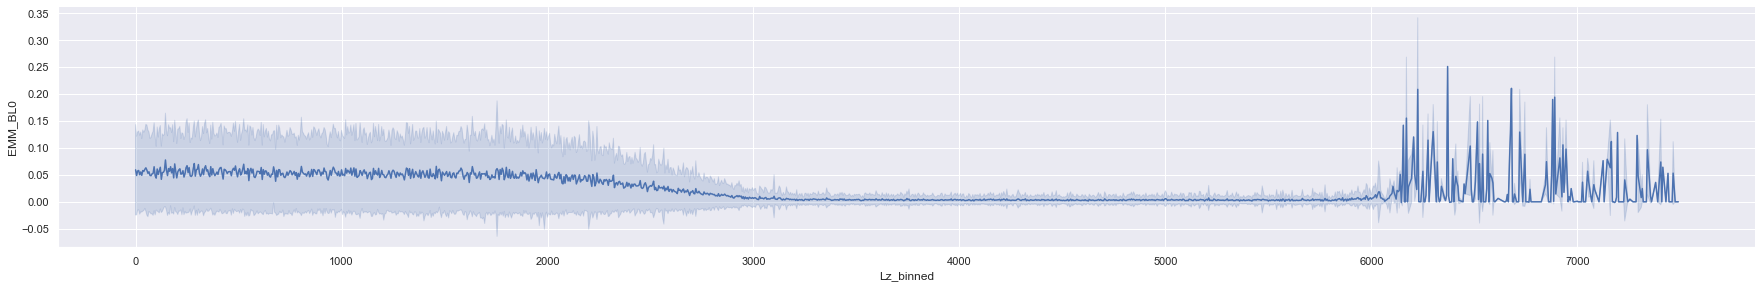

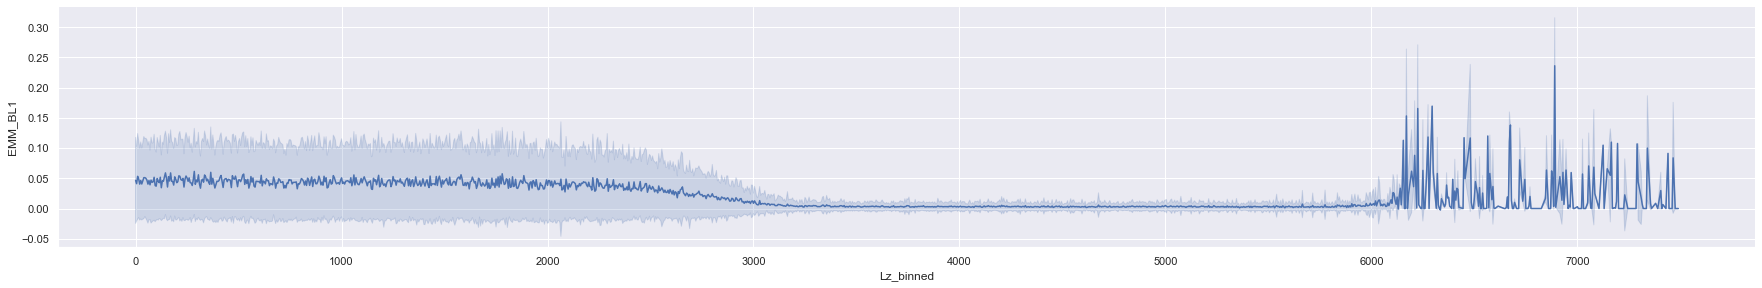

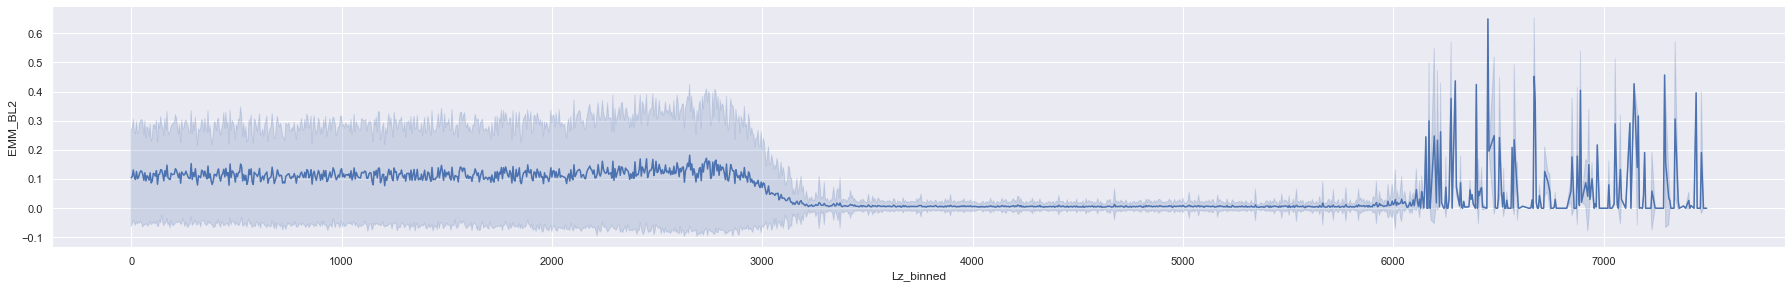

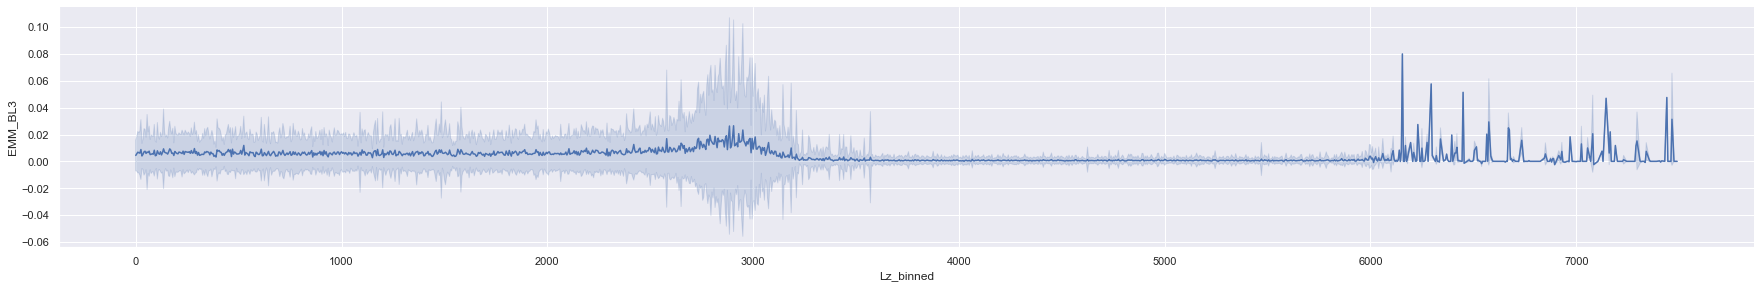

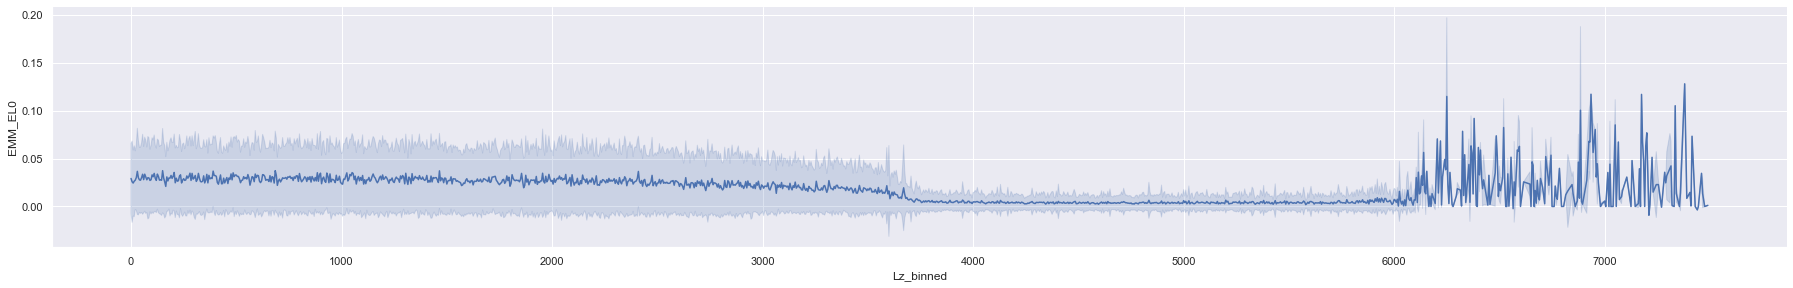

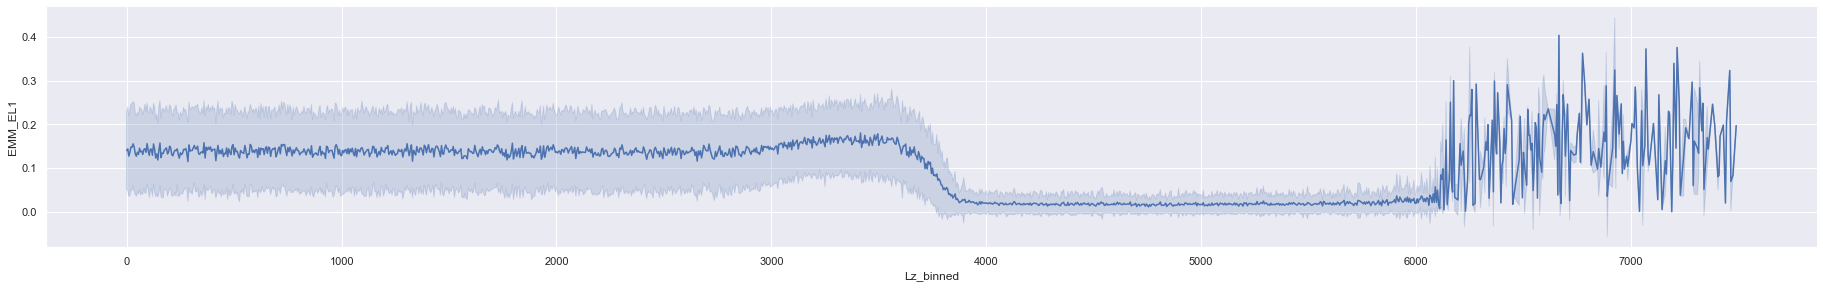

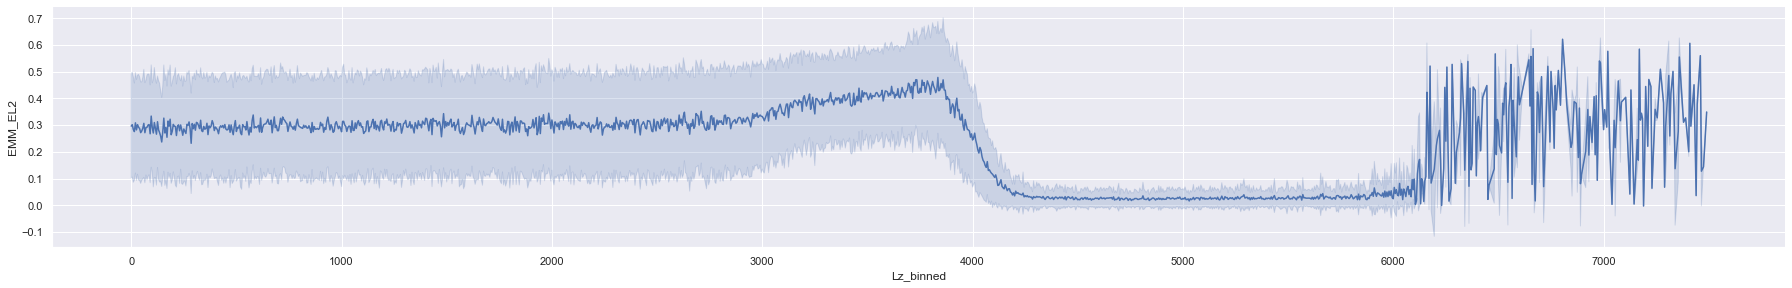

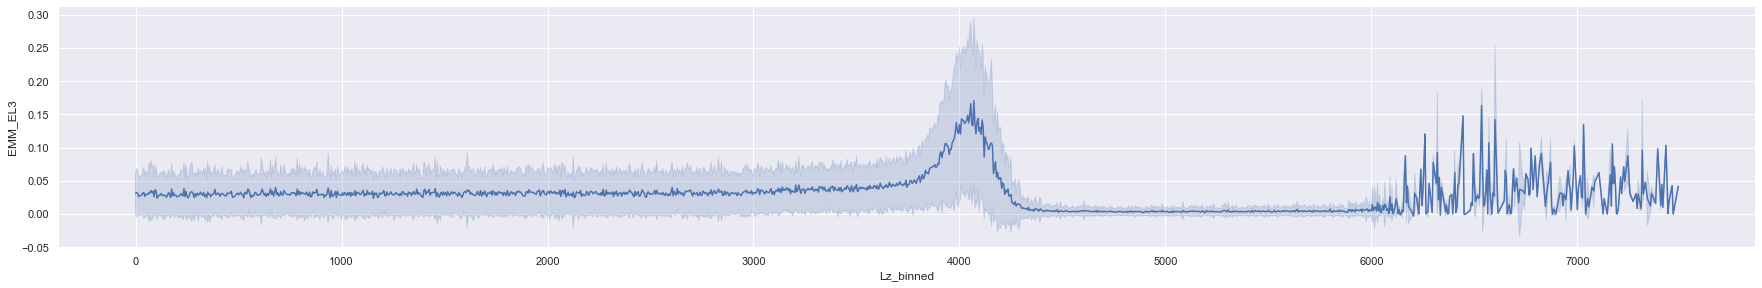

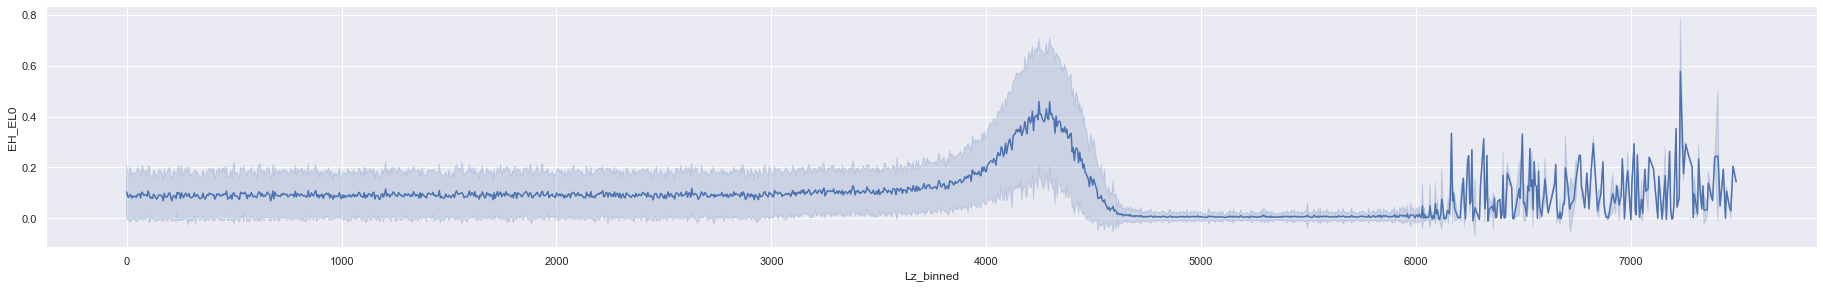

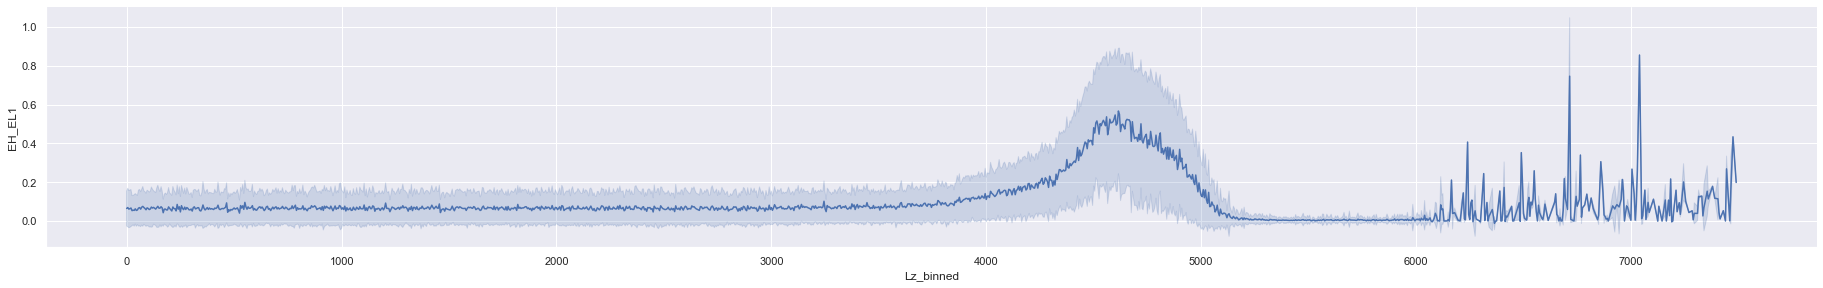

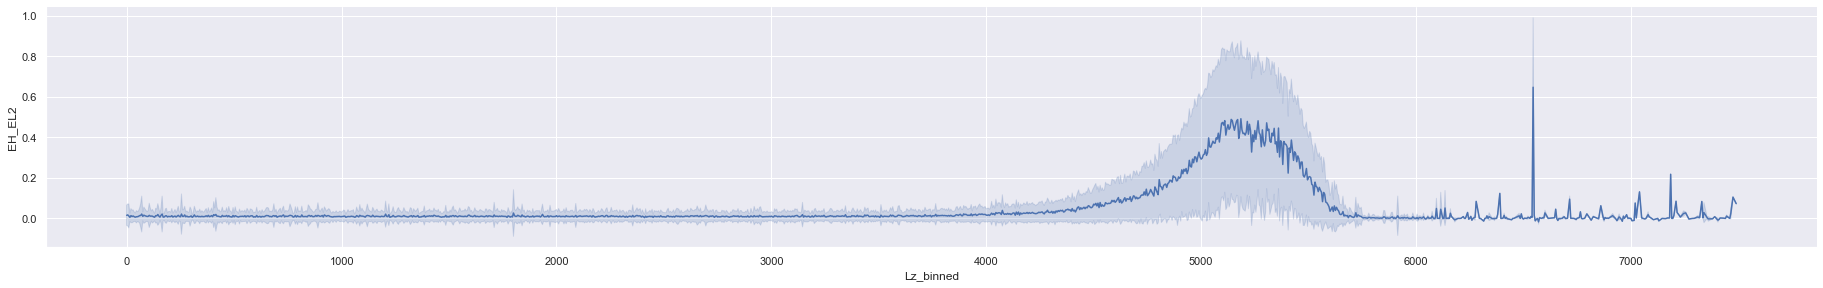

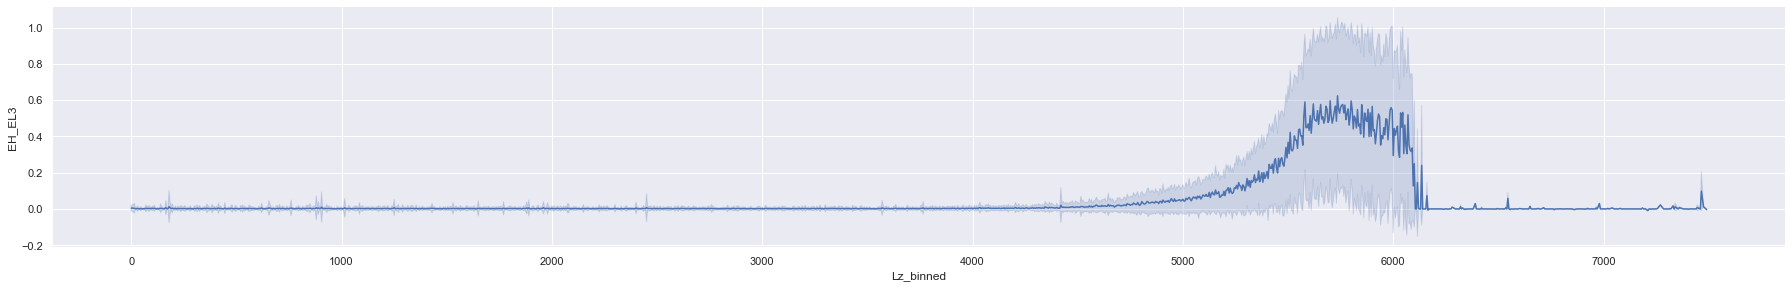

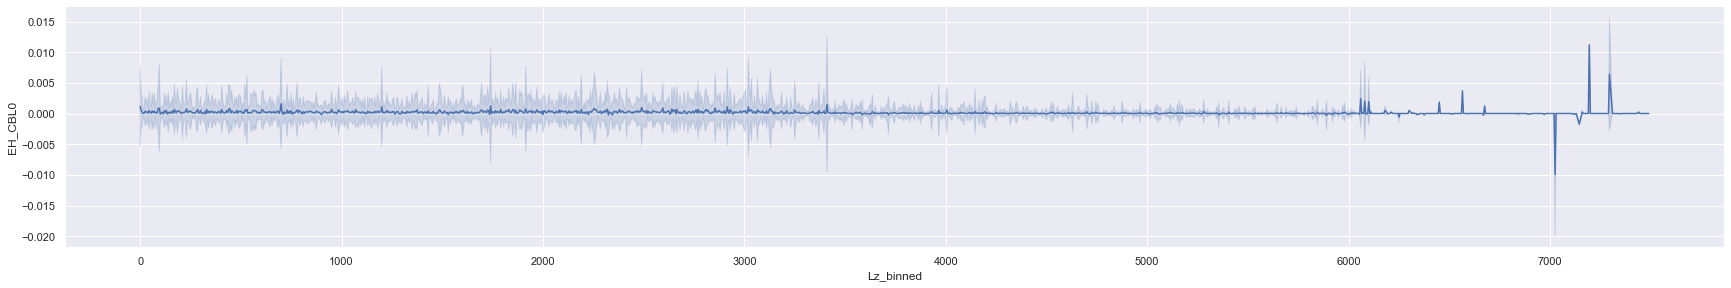

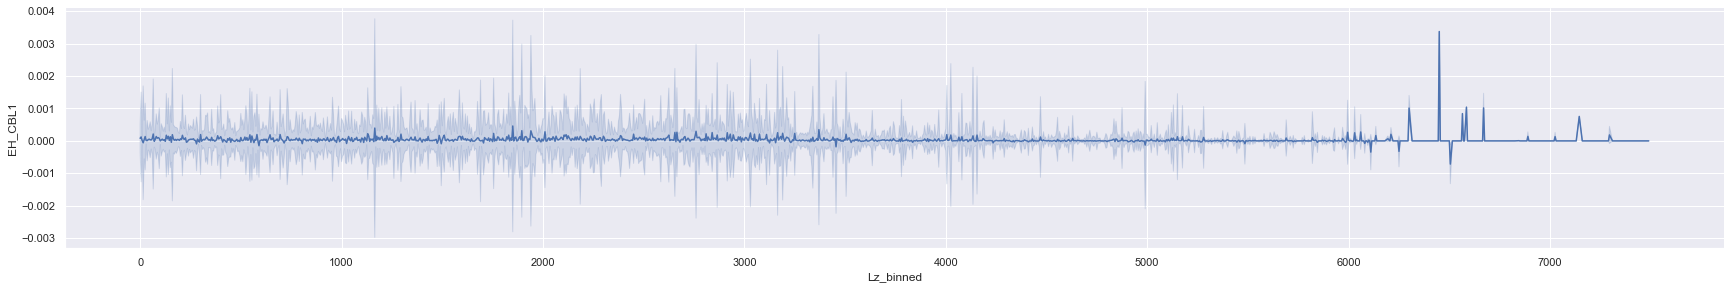

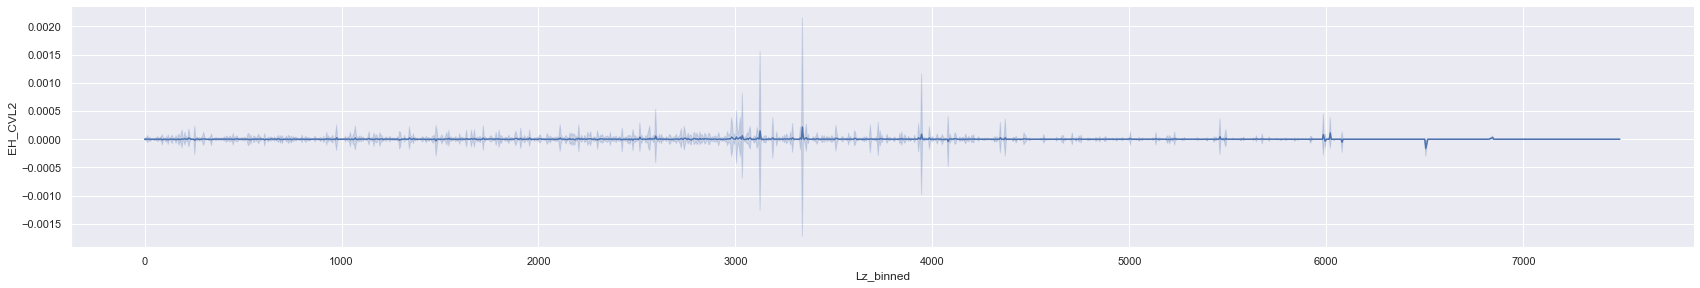

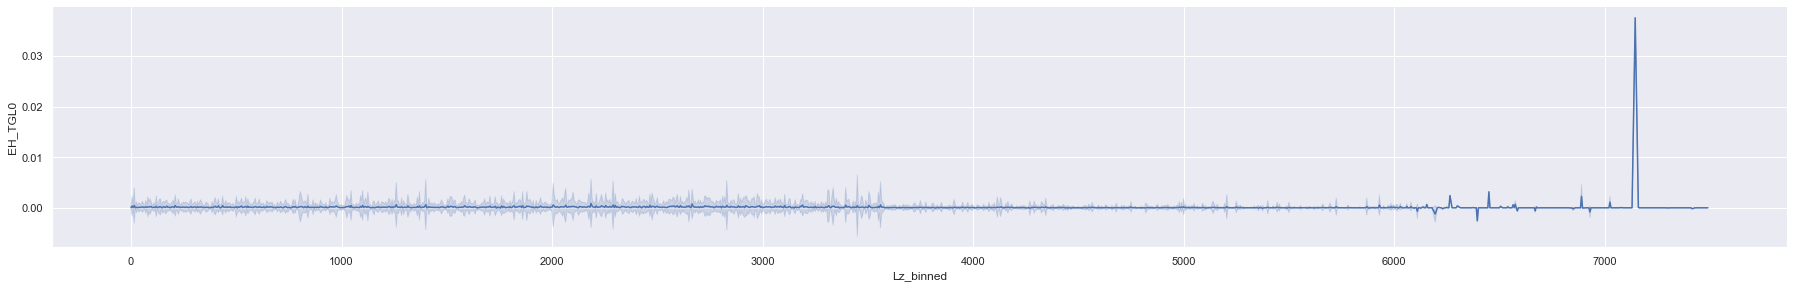

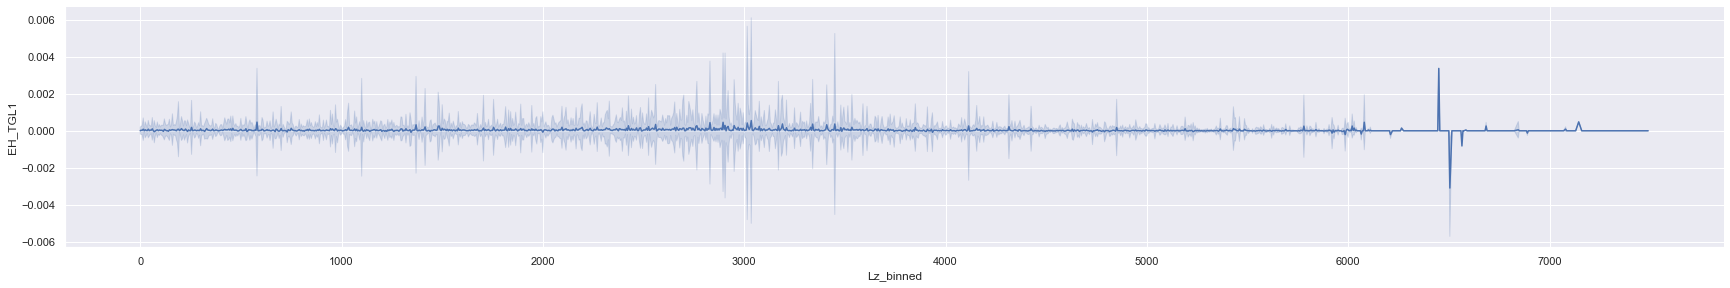

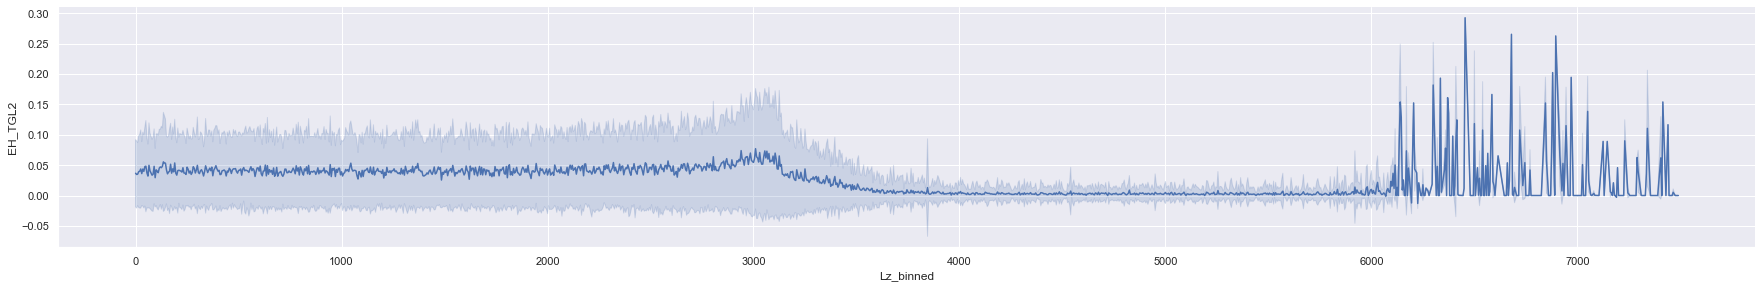

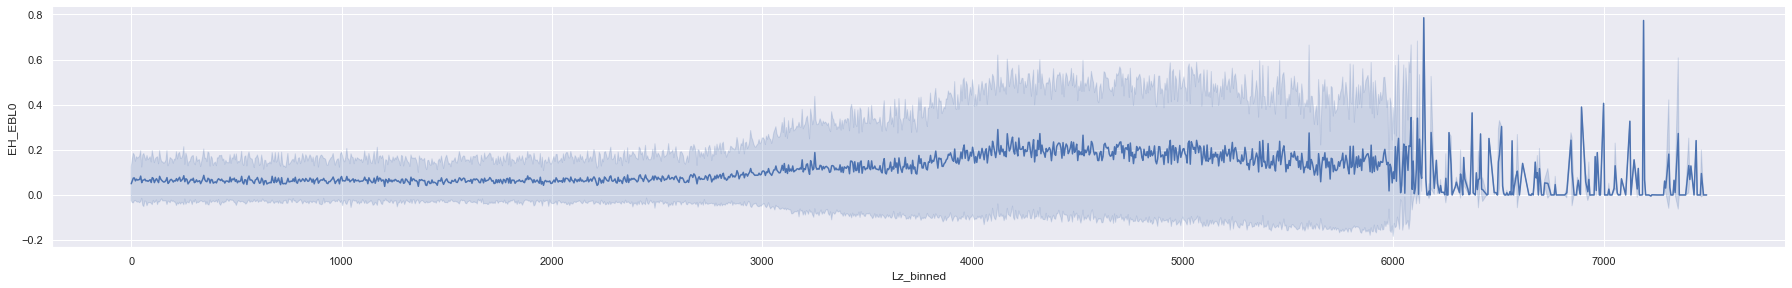

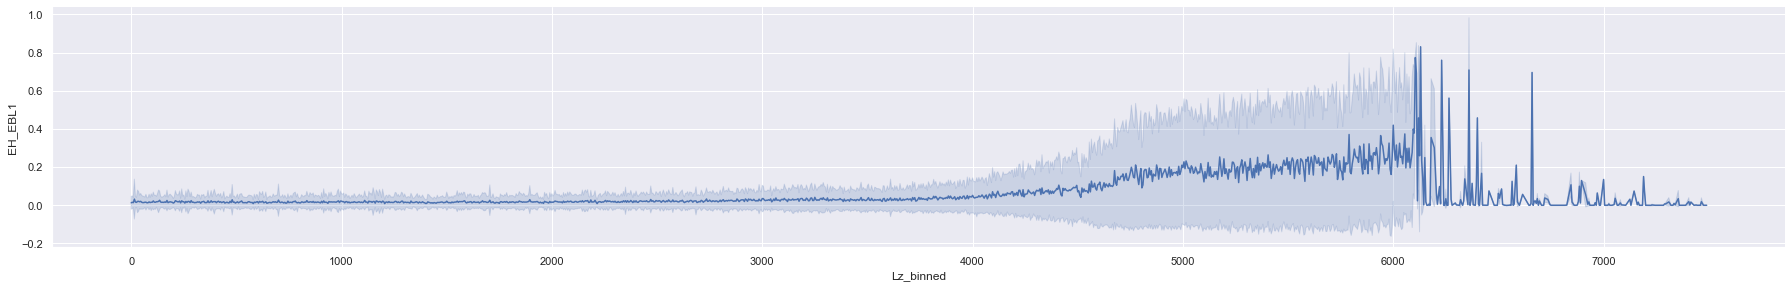

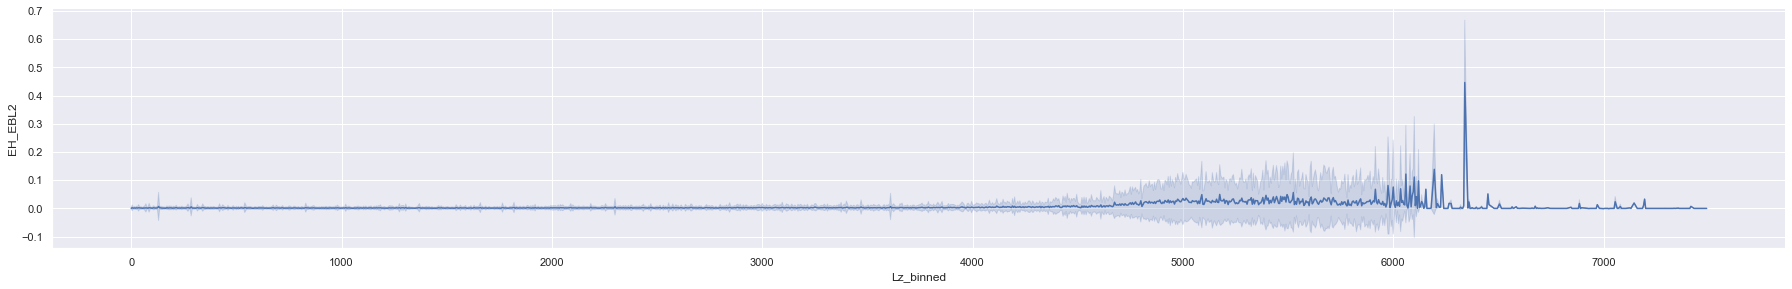

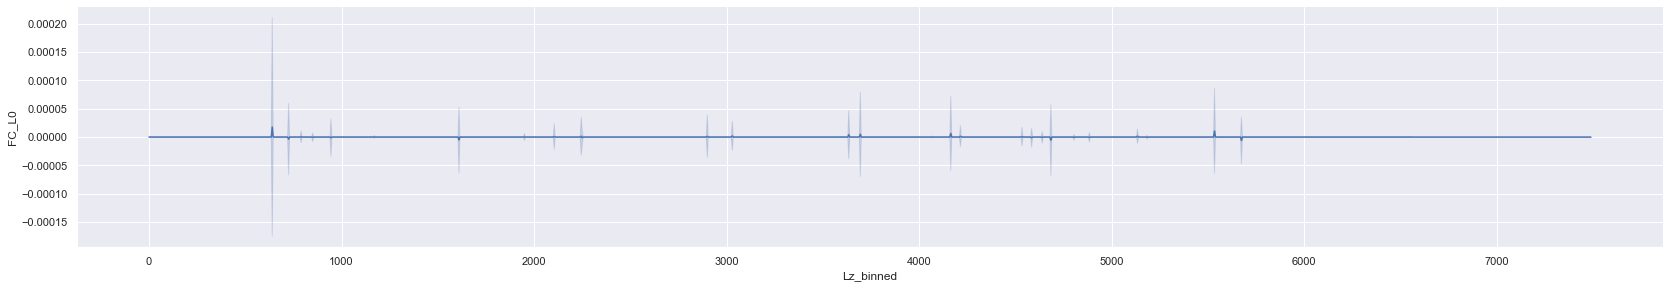

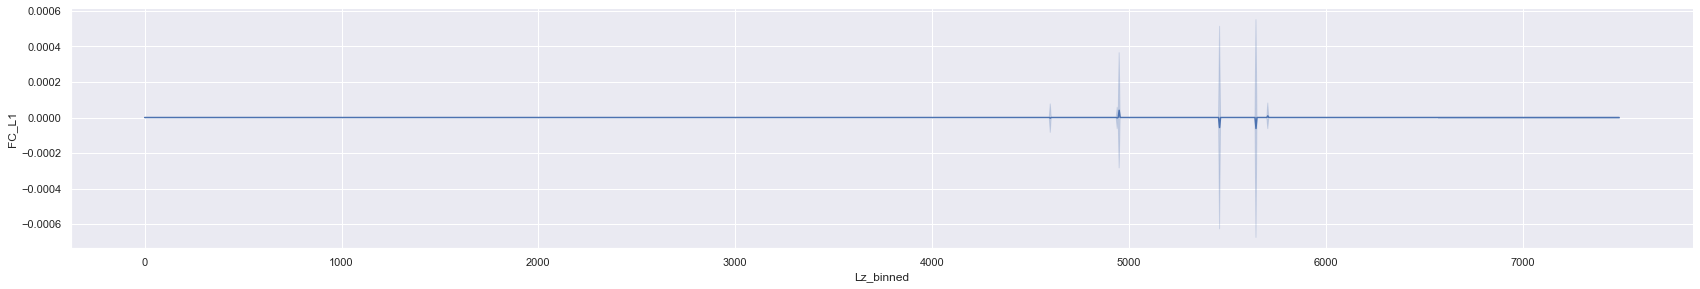

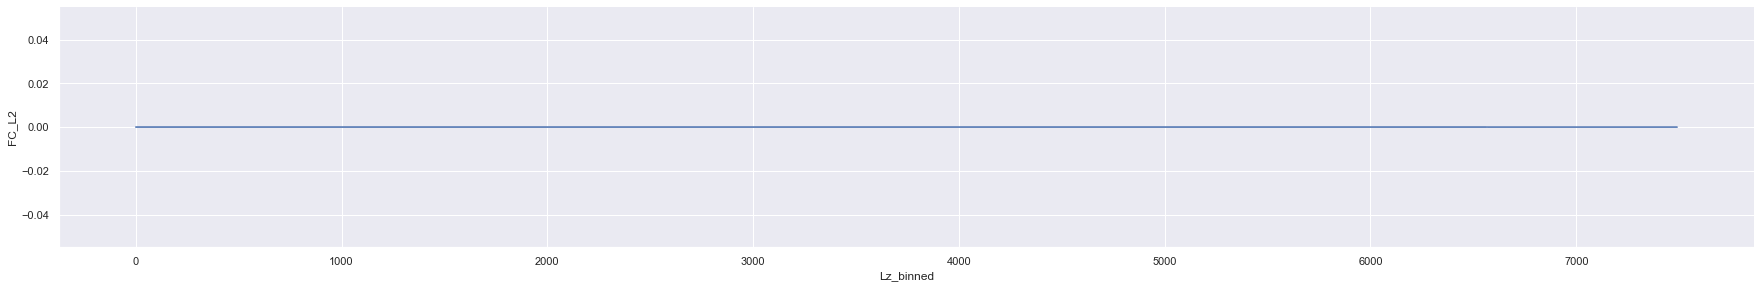

In [167]:
for layer in layers:
    sns.relplot(x="Lz_binned", y=layer, ci='sd', kind="line", data=good_endcap_data)
    set_fig_size()

Conclusions are pretty similar. Probably looking at `EMM_EL0` is the right place to determine the turn-on.

Another question - how must does this vary with sample? That is, by jet $p_T$ mostly? We can make a plot per sample to show that:

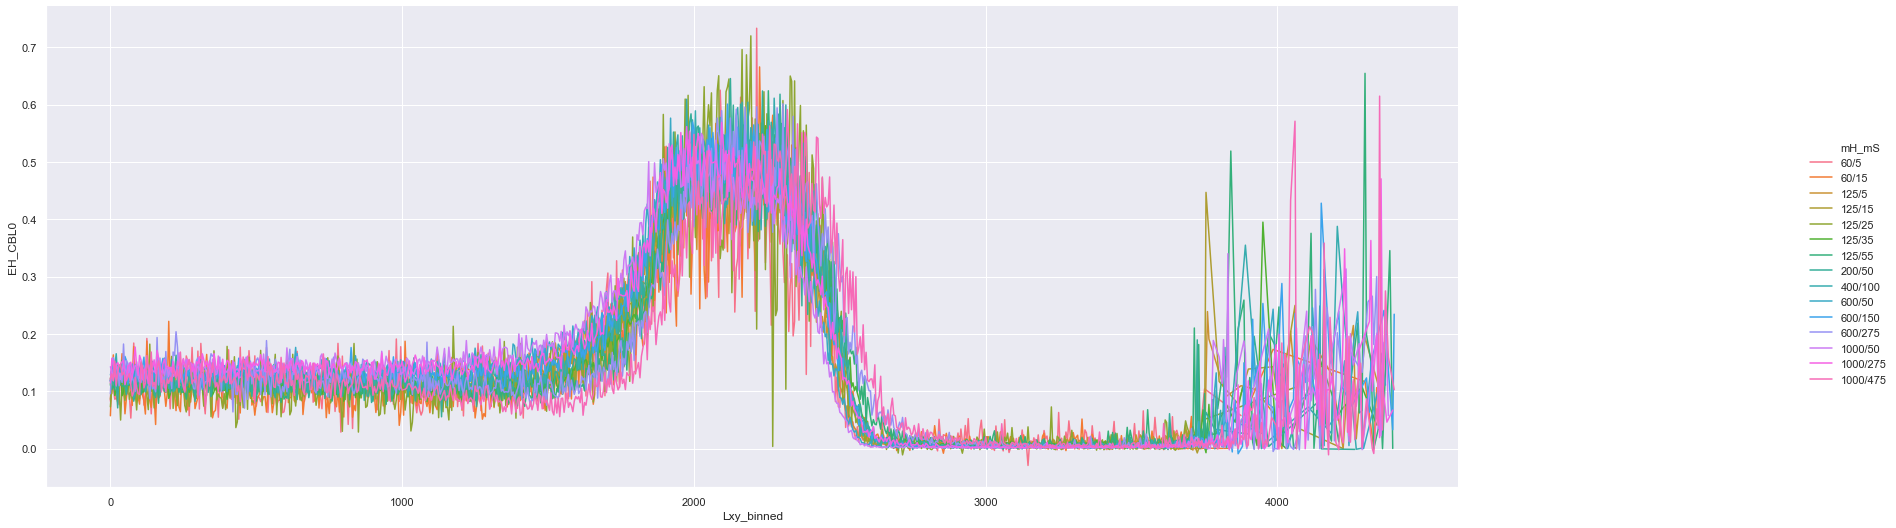

In [178]:
sns.relplot(x="Lxy_binned", y='EH_CBL0', hue='mH_mS', ci=None, kind="line", data=good_barrel_data)
set_fig_size(2)

### Determining the lower training bound

If a decay is too close to the IP, then our MLP will have no hope of figuring out where it is. Rather than confusing the training with that data, I'd like to put in lower-bound cut-off. In the above list of layer plots I pulled out two for high resolution study to see if we can use them to mark the lower bound cut-off.

In [18]:
too_short_dist_lxy=1300

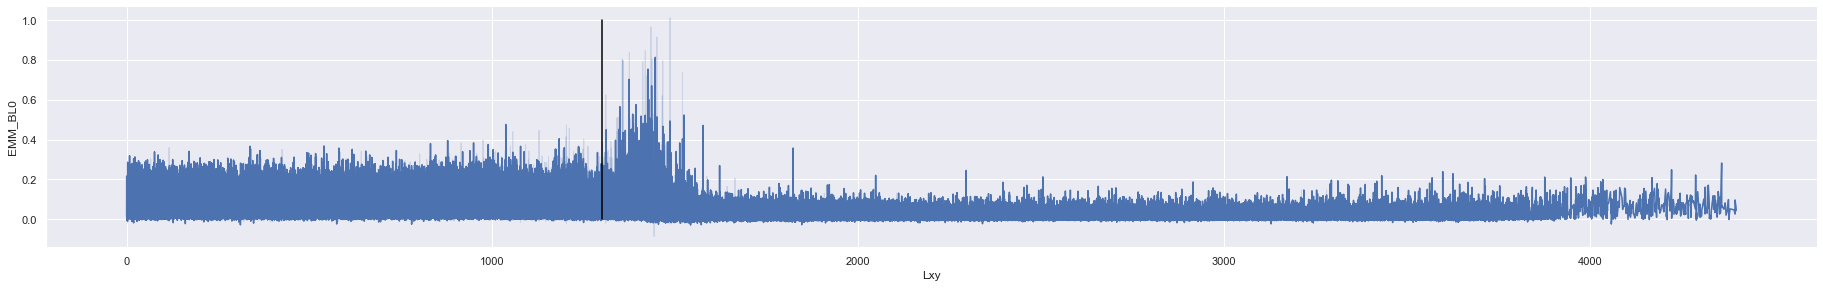

In [176]:
sns.relplot(x="Lxy", y="EMM_BL0", ci='sd', kind="line", data=good_barrel_data)
plt.plot((too_short_dist_lxy, too_short_dist_lxy), (0, 1.0), color="black")
set_fig_size()
plt.show()

In [19]:
too_short_dist_lz=3500

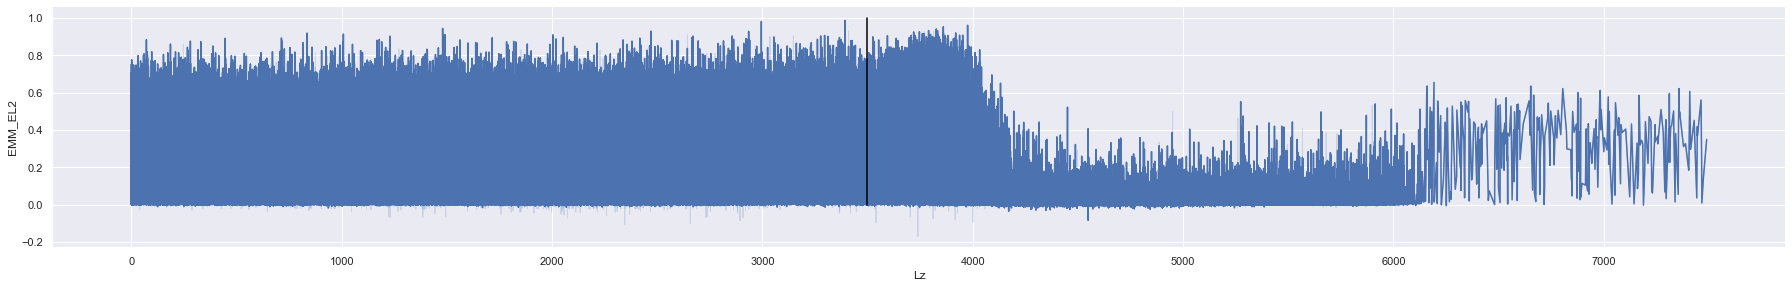

In [182]:
sns.relplot(x="Lz", y="EMM_EL2", ci='sd', kind="line", data=good_endcap_data)
plt.plot((too_short_dist_lz, too_short_dist_lz), (0, 1.0), color="black")
set_fig_size()
plt.show()

## What do we have in the way of training?

Just counting the number of jets that are in the $L_{xy}$ and $L_{z}$ region - that can be used for training?

- Jet $p_T > 40$ GeV
- Max $L_{xy}$ and $L_{z}$ as described above.
- Minimum values as well, as described above.

Below is not finished yet...

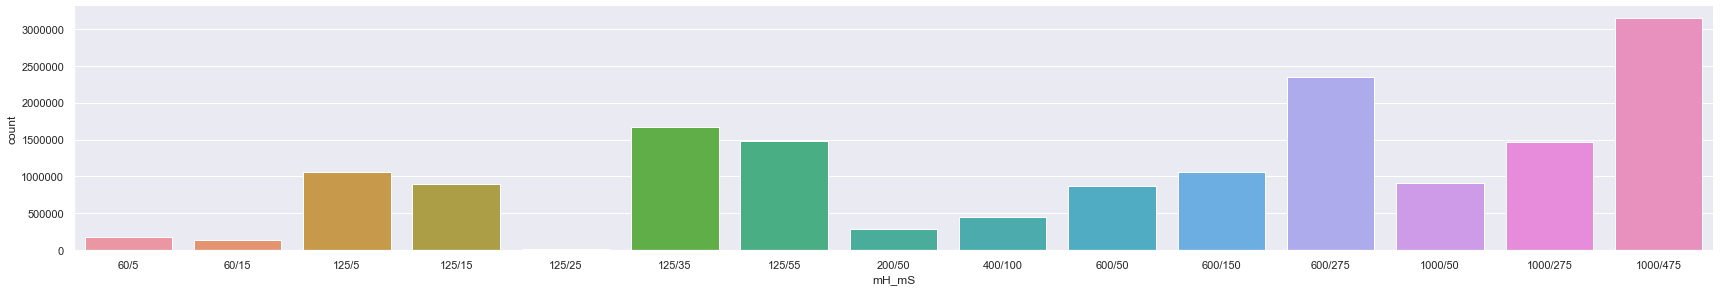

In [11]:
sns.catplot(x="mH_mS", kind="count", data=all_jets)
set_fig_size()

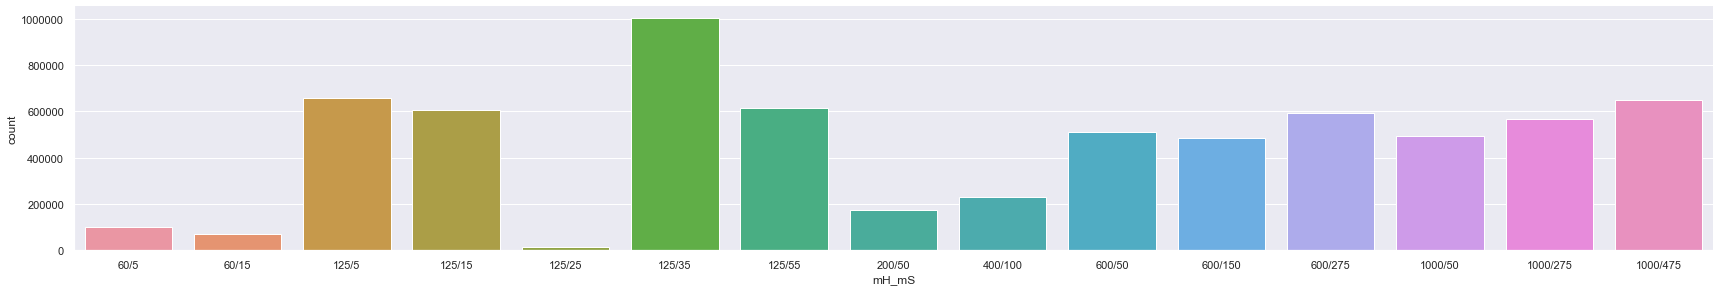

In [12]:
sns.catplot(x="mH_mS", kind="count", data=all_jets[all_jets.IsLLP])
set_fig_size()

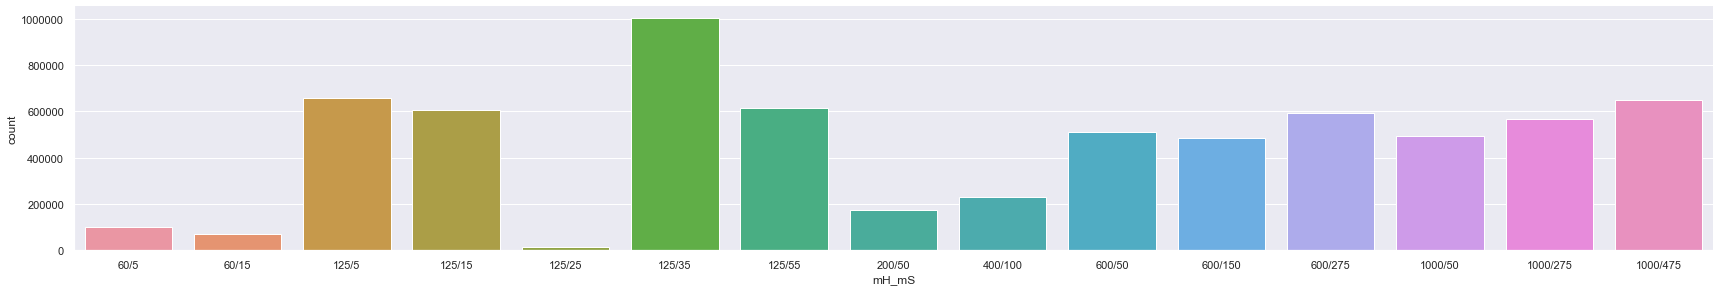

In [14]:
sns.catplot(x="mH_mS", kind="count", data=all_jets[all_jets.IsLLP & (all_jets.JetPt > 40)])
set_fig_size()

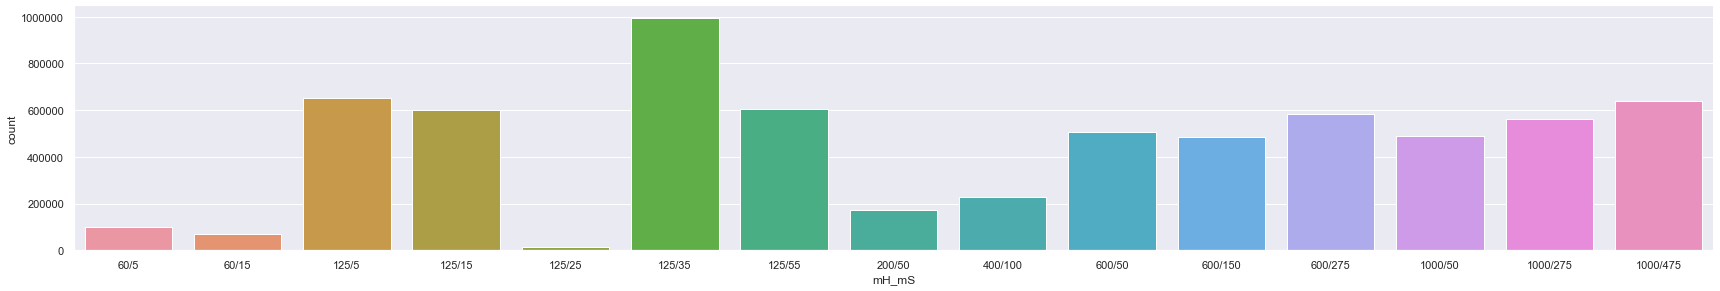

In [15]:
sns.catplot(x="mH_mS", kind="count", data=all_jets[all_jets.IsLLP & (all_jets.JetPt > 40) & (np.abs(all_jets.JetEta) < 2.4)])
set_fig_size()

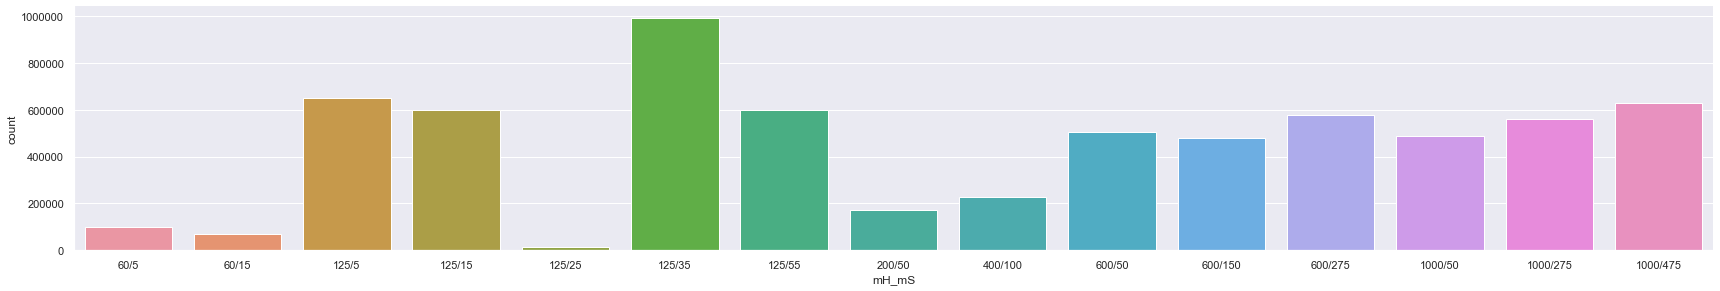

In [17]:
sns.catplot(x="mH_mS", kind="count", data=all_jets[all_jets.IsLLP & (all_jets.JetPt > 40) & (np.abs(all_jets.JetEta) < 2.4) & (all_jets.IsOutlier == False)])
set_fig_size()

In [20]:
all_jets['IsInlier'] = False
all_jets['IsInlier'] |= all_jets.Lxy[all_jets.IsLLP & (np.abs(all_jets.JetEta) < lxyz_eta_division)] < too_short_dist_lxy
all_jets['IsInlier'] |= all_jets.Lz[all_jets.IsLLP & (np.abs(all_jets.JetEta) >= lxyz_eta_division)] < too_short_dist_lz

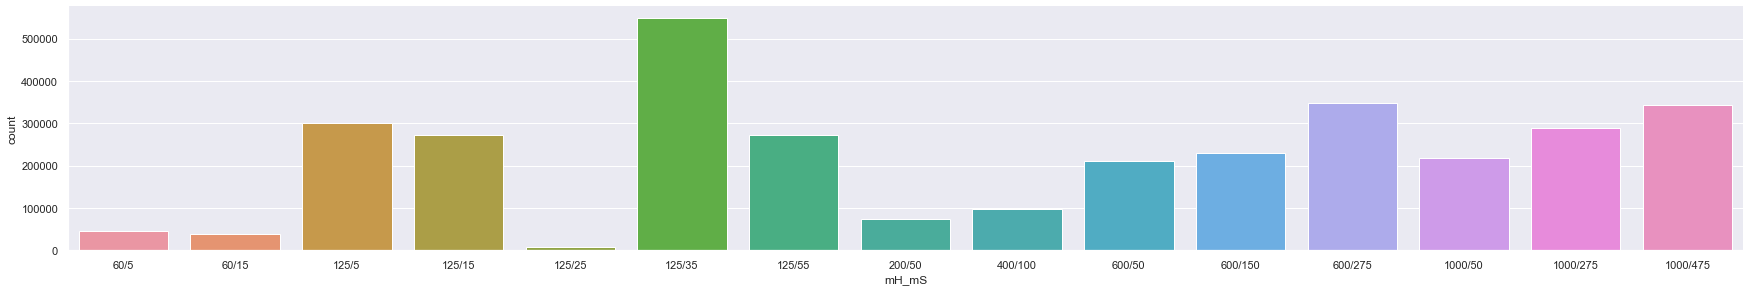

In [21]:
sns.catplot(x="mH_mS", kind="count", data=all_jets[all_jets.IsLLP & (all_jets.JetPt > 40) & (np.abs(all_jets.JetEta) < 2.4) & (all_jets.IsOutlier == False) & (all_jets.IsInlier == False)])
set_fig_size()